# Super Store Analysis

- ### <a href="#intro">Introduction</a>
- ### <a href="#wrangling">Data Wrangling</a>
- ### <a href="#eda">Exploratory Data Analysis</a>
- ### <a href="#conc"> EDA Conclusion</a>
- ### <a href="#ml">Machine Learning</a>

## <a id='intro'>introduction</a>

Super Store is an online multinational platform started at 2010 focusing on e-commerce ,selling various
products to thousands of customers around the world.

we'll be analyzing the super store dataset after cleaning it to help the store understand its performance and give some recommendations that could help increase the store's sales.

## <a id="wrangling">Data Wrangling</a>

### 0 | Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

## taking a quick look at the data 

### 1 | Read data and check number of rows and columns

In [2]:
data = pd.read_excel("Raw Data F.xlsx")

In [3]:
pd.set_option('display.max_columns', None) # displays all coumns
data.sample(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,product_name.1,product_name.2,product_name.3,product_name.4,product_name.5,Unit Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
39929,SF-2013-430,2014-06-27,2014-07-02,Standard Class,Guy Phonely,Corporate,Ar Riyad,United Kingdom,EU,North,TEC-MA-10003923,TECHNOLOGY,MACHINES,Okidata Receipt Printer,Durable,NaN,NaN,NaN,NaN,110,4,0.00,18.50,Medium,440,398.8950,458.50,2014
13335,BU-2013-2690,2012-07-04,2012-07-10,Standard Class,Scot Wooten,Consumer,England,United Kingdom,EU,North,OFF-ST-10003147,OFFICE SUPPLIES,STORAGE,Tenex Box,Blue,NaN,NaN,NaN,NaN,303,6,0.00,8.35,Medium,1818,1588.9245,1826.35,2012
40430,ES-2013-3499281,2014-07-10,2014-07-13,First Class,Dianna Wilson,Home Office,Greater Accra,Cuba,LATAM,Caribbean,FUR-FU-10000776,FURNITURE,FURNISHINGS,Deflect-O Door Stop,Erganomic,NaN,NaN,NaN,NaN,170,2,0.00,2.98,Medium,340,298.3926,342.98,2014
43391,ES-2014-5931653,2014-09-10,2014-09-14,Standard Class,Stefania Perrino,Corporate,Pennsylvania,Senegal,Africa,Africa,OFF-ENE-10001906,OFFICE SUPPLIES,PAPER,Enermax Message Books,Recycled,NaN,NaN,NaN,NaN,380,1,0.00,2.98,High,380,333.1926,382.98,2014
23375,MX-2014-155222,2013-05-16,2013-05-18,First Class,Roland Fjeld,Consumer,Sumatera Utara,Indonesia,APAC,Southeast Asia,OFF-AR-10001922,OFFICE SUPPLIES,ART,Sanford Pens,Blue,NaN,NaN,NaN,NaN,278,2,0.27,0.34,Medium,556,353.4114,406.22,2013


In [4]:
num_rows, num_cols = data.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 51318
Number of columns: 28


### 2 | Data type of each column

In [5]:
 data.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
product_name.1            object
product_name.2            object
product_name.3            object
product_name.4            object
product_name.5            object
Unit Price                 int64
quantity                   int64
discount                 float64
shipping_cost            float64
order_priority            object
sales                      int64
expenses                 float64
revenue                  float64
year                       int64
dtype: object

> data types for each column are right

In [6]:
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'product_name.1',
       'product_name.2', 'product_name.3', 'product_name.4', 'product_name.5',
       'Unit Price', 'quantity', 'discount', 'shipping_cost', 'order_priority',
       'sales', 'expenses', 'revenue ', 'year'],
      dtype='object')

> - we need to fix the product name column looks like its splited into 6 columns: <p/> ('product_name', 'product_name.1','product_name.2', 'product_name.3', 'product_name.4', 'product_name.5')</p>
> - we need to fix columns names</p>

### 3 | Fixing product_name column

In [7]:
# filling nan values with a value '*' so we can deal with it as a string
data[["product_name.1", "product_name.2", "product_name.3", "product_name.4", "product_name.5"]] = data[["product_name.1",
                    "product_name.2", "product_name.3", "product_name.4", "product_name.5"]].fillna("*")
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,product_name.1,product_name.2,product_name.3,product_name.4,product_name.5,Unit Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,OFFICE SUPPLIES,STORAGE,Tenex Lockers,Blue,*,*,*,*,211,2,0.0,35.46,Medium,422,397.9902,457.46,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,OFFICE SUPPLIES,SUPPLIES,Acme Trimmer,High Speed,*,*,*,*,129,3,0.1,9.72,Medium,387,311.4774,358.02,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,OFFICE SUPPLIES,STORAGE,Tenex Box,Single Width,*,*,*,*,128,4,0.0,8.17,High,512,452.5479,520.17,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,OFFICE SUPPLIES,PAPER,Enermax Note Cards,Premium,*,*,*,*,177,3,0.5,4.82,High,531,235.1784,270.32,2011
4,CA-2011-1510,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,FURNITURE,FURNISHINGS,Eldon Light Bulb,Duo Pack,*,*,*,*,222,5,0.1,4.70,Medium,1110,873.2190,1003.70,2088


In [8]:
# concatenating all product name columns
data['product_name'] = data["product_name"].str.cat(data[["product_name.1", "product_name.2",
            "product_name.3", "product_name.4", "product_name.5"]].astype(str), sep=" ")
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,product_name.1,product_name.2,product_name.3,product_name.4,product_name.5,Unit Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,OFFICE SUPPLIES,STORAGE,Tenex Lockers Blue * * * *,Blue,*,*,*,*,211,2,0.0,35.46,Medium,422,397.9902,457.46,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,OFFICE SUPPLIES,SUPPLIES,Acme Trimmer High Speed * * * *,High Speed,*,*,*,*,129,3,0.1,9.72,Medium,387,311.4774,358.02,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,OFFICE SUPPLIES,STORAGE,Tenex Box Single Width * * * *,Single Width,*,*,*,*,128,4,0.0,8.17,High,512,452.5479,520.17,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,OFFICE SUPPLIES,PAPER,Enermax Note Cards Premium * * * *,Premium,*,*,*,*,177,3,0.5,4.82,High,531,235.1784,270.32,2011
4,CA-2011-1510,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,FURNITURE,FURNISHINGS,Eldon Light Bulb Duo Pack * * * *,Duo Pack,*,*,*,*,222,5,0.1,4.70,Medium,1110,873.2190,1003.70,2088


In [9]:
# know we'll remove "*", and drop extra columns
data['product_name'] = data['product_name'].str.replace("*", "", regex=False).str.strip().str.title()
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,product_name.1,product_name.2,product_name.3,product_name.4,product_name.5,Unit Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,OFFICE SUPPLIES,STORAGE,Tenex Lockers Blue,Blue,*,*,*,*,211,2,0.0,35.46,Medium,422,397.9902,457.46,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,OFFICE SUPPLIES,SUPPLIES,Acme Trimmer High Speed,High Speed,*,*,*,*,129,3,0.1,9.72,Medium,387,311.4774,358.02,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,OFFICE SUPPLIES,STORAGE,Tenex Box Single Width,Single Width,*,*,*,*,128,4,0.0,8.17,High,512,452.5479,520.17,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,OFFICE SUPPLIES,PAPER,Enermax Note Cards Premium,Premium,*,*,*,*,177,3,0.5,4.82,High,531,235.1784,270.32,2011
4,CA-2011-1510,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,FURNITURE,FURNISHINGS,Eldon Light Bulb Duo Pack,Duo Pack,*,*,*,*,222,5,0.1,4.70,Medium,1110,873.2190,1003.70,2088


In [10]:
data = data.drop(columns=["product_name.1", "product_name.2","product_name.3", "product_name.4", "product_name.5"])

In [11]:
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,Unit Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,OFFICE SUPPLIES,STORAGE,Tenex Lockers Blue,211,2,0.0,35.46,Medium,422,397.9902,457.46,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,OFFICE SUPPLIES,SUPPLIES,Acme Trimmer High Speed,129,3,0.1,9.72,Medium,387,311.4774,358.02,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,OFFICE SUPPLIES,STORAGE,Tenex Box Single Width,128,4,0.0,8.17,High,512,452.5479,520.17,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,OFFICE SUPPLIES,PAPER,Enermax Note Cards Premium,177,3,0.5,4.82,High,531,235.1784,270.32,2011
4,CA-2011-1510,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,FURNITURE,FURNISHINGS,Eldon Light Bulb Duo Pack,222,5,0.1,4.70,Medium,1110,873.2190,1003.70,2088


### 4 | Fixing columns names

> - 'Unit Price' --> 'unit_price'
> - 'revenue ' --> 'revenue'

In [12]:
data.rename(columns={'Unit Price': 'Unit_Price', 'revenue ':'revenue'}, inplace=True)

In [13]:
data.head(1)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,Unit_Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,OFFICE SUPPLIES,STORAGE,Tenex Lockers Blue,211,2,0.0,35.46,Medium,422,397.9902,457.46,2011


## looking for other internal issues in the data

> ##### *1- uniqe values*
> ##### *2- adjusting columns values*
> ##### *3- data description*
> ##### *4- duplicates*
> ##### *5- missing values*
> ##### *6- extracting month, day, year and quarter*
> ##### *7- creating profit*

### 1 | Exploring unique values

#### 1.1| percentage of each unique values

In [14]:
# sorted series countains of each column's count of unique values
unique_values = data.nunique().sort_values(ascending=False)

# portion of unique values
portions = unique_values / data.shape[0]

In [15]:
# selecting only columns tha have more than 0.2% unique values
uniques = portions[portions > 0.002]
uniques

revenue          0.886531
expenses         0.882439
order_id         0.487841
product_id       0.200553
shipping_cost    0.195584
product_name     0.073814
sales            0.046572
ship_date        0.028528
order_date       0.027865
state            0.021318
customer_name    0.015492
Unit_Price       0.008555
country          0.002864
dtype: float64

In [16]:
uniq_indexes = list(uniques.index) # list of the  selected columns' names 
unaiq_values = list(uniques.values) # list of the portions

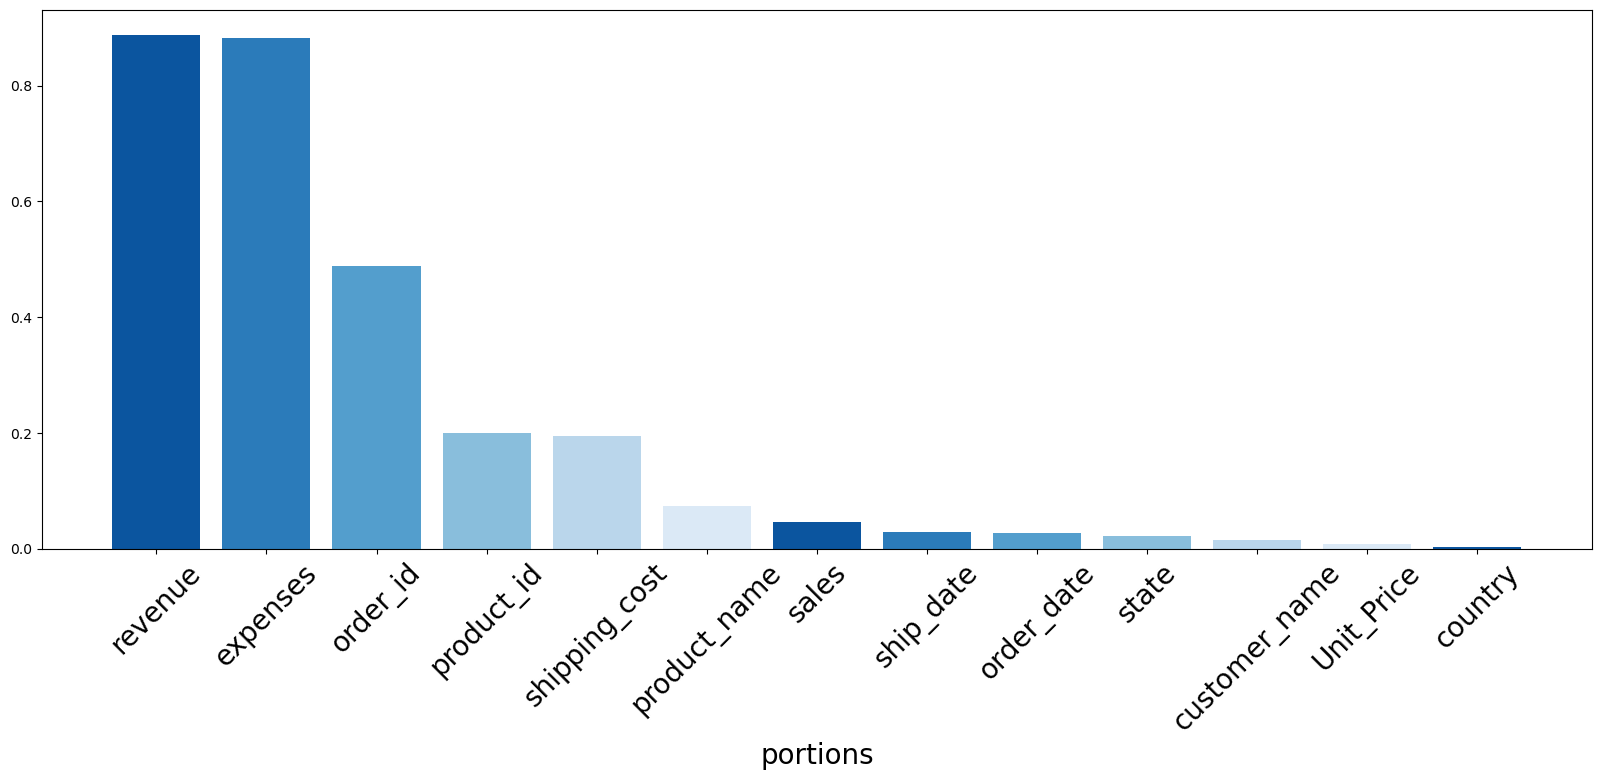

In [17]:
plt.figure(figsize=(20, 7))
plt.bar(uniq_indexes, unaiq_values, color=sns.color_palette('Blues_r'))
plt.xticks(uniq_indexes, rotation=45, fontsize=20)
plt.xlabel("portions", fontsize=20)
plt.show()

> - there isn't a single column that can represent the dataset's recods, not even the "order_id" column </p>
> - but how come order id is not unique? the dataset has only about 50% unique ids </p>

> <h4>if we took some order ids and search for their duplicates we could be able to understand: </h4></p>
> <p/>
   > - is there any pattren between order id records ?</p>
   > - why they aren't unique ? </p>
   > - should we keep them or it would be better to create new indexes? </p>

#### 1.2 | Are order_id column significant ?

In [18]:
# picking two duplicated order_id
id_sample = data[data['order_id'].duplicated()].order_id.unique()[:2]
id_sample

array(['IN-2011-47883', 'IN-2011-65159'], dtype=object)

In [19]:
# our first id
data[data["order_id"] == id_sample[0]]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,Unit_Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,OFFICE SUPPLIES,SUPPLIES,Acme Trimmer High Speed,129,3,0.1,9.72,Medium,387,311.4774,358.02,2011
25035,IN-2011-47883,2013-06-24,2013-06-24,Same Day,Aimee Bixby,Consumer,Cuscatlán,El Salvador,LATAM,Central,OFF-PA-10004600,OFFICE SUPPLIES,PAPER,Xerox Cards & Envelopes Premium,381,6,0.0,22.03,High,2286,2007.9861,2308.03,2013
25036,IN-2011-47883,2013-06-24,2013-07-01,Standard Class,Tiffany House,Corporate,Lucerne,Switzerland,EU,Central,OFF-ST-10003153,OFFICE SUPPLIES,STORAGE,Tenex File Cart Single Width,327,2,0.0,18.52,Medium,654,585.0924,672.52,2013


> - we got only one match
> -'IN-2011-47883' order ids have the same category type
> - does that mean that order id groups the data by category?
> - lets test our hypothesis with another order id

In [20]:
# second order id
data[data["order_id"] == id_sample[1]]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,Unit_Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
8,IN-2011-65159,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,TEC-CO-10004182,TECHNOLOGY,COPIERS,Hewlett Wireless Fax Laser,400,4,0.4,107.10,Low,1600,928.3770,1067.10,2011
25037,IN-2011-65159,2013-06-24,2013-06-26,Second Class,Thomas Boland,Corporate,Alagoas,Brazil,LATAM,South,FUR-BO-10002592,FURNITURE,BOOKCASES,Safco Stackable Bookrack Traditional,266,5,0.6,16.28,High,1330,477.0036,548.28,2013
25044,IN-2011-65159,2013-06-24,2013-06-29,Standard Class,Jack Lebron,Consumer,Kano,Nigeria,Africa,Africa,OFF-ROG-10001735,OFFICE SUPPLIES,STORAGE,Rogers Lockers Blue,407,4,0.7,12.18,Medium,1628,435.5046,500.58,2013
50512,IN-2011-65159,2011-01-03,2011-01-07,Second Class,Larry Blacks,Consumer,National Capital,Mexico,LATAM,North,FUR-FU-10000060,FURNITURE,FURNISHINGS,Advantus Light Bulb Duo Pack,244,2,0.4,0.82,Medium,488,255.4494,293.62,2014


> - there isn't a consistent category type for order id 'IN-2011-65159'
> - know we can reject our hypothesis 
> - and based on that "oder_id" doesn't seem to have any meaning, it could just be faulty.
> - we shall drop this column and create new id

In [21]:
# dropping id column
data = data.drop('order_id', axis=1)

In [22]:
data.head()

,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,Unit_Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
0,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,OFFICE SUPPLIES,STORAGE,Tenex Lockers Blue,211,2,0.0,35.46,Medium,422,397.9902,457.46,2011
1,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,OFFICE SUPPLIES,SUPPLIES,Acme Trimmer High Speed,129,3,0.1,9.72,Medium,387,311.4774,358.02,2011
2,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,OFFICE SUPPLIES,STORAGE,Tenex Box Single Width,128,4,0.0,8.17,High,512,452.5479,520.17,2011
3,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,OFFICE SUPPLIES,PAPER,Enermax Note Cards Premium,177,3,0.5,4.82,High,531,235.1784,270.32,2011
4,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,FURNITURE,FURNISHINGS,Eldon Light Bulb Duo Pack,222,5,0.1,4.70,Medium,1110,873.2190,1003.70,2088


> now we need to creat an id column for each order in our dataset

In [23]:
data.shape

(51318, 22)

In [24]:
# increase the count by one for each row
data['id'] = data.index + 1

In [25]:
# checking for the added column
data.head()

,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,Unit_Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year,id
0,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,OFFICE SUPPLIES,STORAGE,Tenex Lockers Blue,211,2,0.0,35.46,Medium,422,397.9902,457.46,2011,1
1,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,OFFICE SUPPLIES,SUPPLIES,Acme Trimmer High Speed,129,3,0.1,9.72,Medium,387,311.4774,358.02,2011,2
2,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,OFFICE SUPPLIES,STORAGE,Tenex Box Single Width,128,4,0.0,8.17,High,512,452.5479,520.17,2011,3
3,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,OFFICE SUPPLIES,PAPER,Enermax Note Cards Premium,177,3,0.5,4.82,High,531,235.1784,270.32,2011,4
4,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,FURNITURE,FURNISHINGS,Eldon Light Bulb Duo Pack,222,5,0.1,4.70,Medium,1110,873.2190,1003.70,2088,5


> it would be better if we moved id column to be our first column

In [26]:
data.columns

Index(['order_date', 'ship_date', 'ship_mode', 'customer_name', 'segment',
       'state', 'country', 'market', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'Unit_Price', 'quantity', 'discount',
       'shipping_cost', 'order_priority', 'sales', 'expenses', 'revenue',
       'year', 'id'],
      dtype='object')

In [27]:
data = data.reindex(columns=['id', 'order_date', 'ship_date', 'ship_mode', 'customer_name', 'segment',
       'state', 'country', 'market', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'Unit_Price', 'quantity', 'discount',
       'shipping_cost', 'order_priority', 'sales', 'expenses', 'revenue',
       'year'])

In [28]:
data.head()

,id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,Unit_Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
0,1,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,OFFICE SUPPLIES,STORAGE,Tenex Lockers Blue,211,2,0.0,35.46,Medium,422,397.9902,457.46,2011
1,2,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,OFFICE SUPPLIES,SUPPLIES,Acme Trimmer High Speed,129,3,0.1,9.72,Medium,387,311.4774,358.02,2011
2,3,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,OFFICE SUPPLIES,STORAGE,Tenex Box Single Width,128,4,0.0,8.17,High,512,452.5479,520.17,2011
3,4,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,OFFICE SUPPLIES,PAPER,Enermax Note Cards Premium,177,3,0.5,4.82,High,531,235.1784,270.32,2011
4,5,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,FURNITURE,FURNISHINGS,Eldon Light Bulb Duo Pack,222,5,0.1,4.70,Medium,1110,873.2190,1003.70,2088


> done

### 2 | Adjusting columns values

<h4>we'll adjust categorical data *except for product_id* :</h4>
<p>
1- remove space at the end and beginning of each word </p>
2- remove extra spaces within every text </p>
3- Make the first letter of each word capital </p>

In [29]:
names_list = ['ship_mode', 'customer_name','segment', 'state', 'country', 'market', 'region','category', 'sub_category', 'product_name', 'order_priority']

In [30]:
for col in names_list:
    data[col] = data[col].replace(r'\s+', ' ', regex=True).str.title().str.strip()

In [31]:
data.head()

,id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,Unit_Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,year
0,1,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,Tenex Lockers Blue,211,2,0.0,35.46,Medium,422,397.9902,457.46,2011
1,2,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,Apac,Oceania,OFF-SU-10000618,Office Supplies,Supplies,Acme Trimmer High Speed,129,3,0.1,9.72,Medium,387,311.4774,358.02,2011
2,3,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,Emea,Emea,OFF-TEN-10001585,Office Supplies,Storage,Tenex Box Single Width,128,4,0.0,8.17,High,512,452.5479,520.17,2011
3,4,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,Eu,North,OFF-PA-10001492,Office Supplies,Paper,Enermax Note Cards Premium,177,3,0.5,4.82,High,531,235.1784,270.32,2011
4,5,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,Apac,Oceania,FUR-FU-10003447,Furniture,Furnishings,Eldon Light Bulb Duo Pack,222,5,0.1,4.70,Medium,1110,873.2190,1003.70,2088


### 3 | Data description

In [32]:
data.describe()

,id,Unit_Price,quantity,discount,shipping_cost,sales,expenses,revenue,year
count,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000
mean,25659.500000,237.682314,3.476071,0.142907,26.365946,826.174305,641.180059,736.988574,2012.778713
std,14814.374894,126.278644,2.278623,0.212283,57.284882,752.664627,609.041486,700.047685,1.149308
min,1.000000,19.000000,1.000000,0.000000,0.000000,19.000000,4.489200,5.160000,2001.000000
25%,12830.250000,128.000000,2.000000,0.000000,2.610000,296.000000,217.439100,249.930000,2012.000000
50%,25659.500000,238.000000,3.000000,0.000000,7.790000,604.000000,448.367550,515.365000,2013.000000
75%,38488.750000,347.000000,5.000000,0.200000,24.440000,1125.000000,855.949500,983.850000,2014.000000
max,51318.000000,457.000000,14.000000,0.850000,933.570000,6398.000000,5597.049300,6433.390000,2088.000000


###### summary 
> - <B><font color='red'>ID:</font></B> is an <B>ordinal data</B> so we won't consider it. except for max = 51318  and min = 1 (our dataset has 51318 value)
> - <B><font color='red'>unite price:</font></B> seems to be <B>normaly distirbuted</B> (mean is almost same as median 237.68, 238 ) so no outliers
> - <B><font color='red'>quantity:</font></B> is <B>skewed to the right</B> with a minimum order q of 1 and max of 14, if we got min of 0 than there would've been an issue
> - <B><font color='red'>discounts:</font></B> some orders haven't recived discounts, our highest discount is about 80% 
> - <B><font color='red'>shipping cost:</font></B> is <B> heavily skewed to the right</B> it could be due to the fact that our store deals with variety of markets around the world some of them are far, which require a higher shipment cost. in contrast some orders don't have a shipment cost at all
> - <B><font color='red'>sales:</font></B> also is <B>heavily skewed to the right</B> we need to figure why that occures
> - <B><font color='red'>expenses:</font></B> is <B>normally distributed</B>, nothing abnormal
> - <B><font color='red'>revenue:</font></B> <B>heavily skewed to the right</B>. which could be a good sign, we need to figure what are the products that cause this skewness
> - <B><font color='red'>year:</font></B> column does not seem right it has an <B>outlier</B> "2088" that doesn't seem correct. we'll remove this column and extract the date ourself

In [33]:
# dropping year column
data = data.drop("year", axis=1)

In [34]:
data.columns

Index(['id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'Unit_Price', 'quantity',
       'discount', 'shipping_cost', 'order_priority', 'sales', 'expenses',
       'revenue'],
      dtype='object')

## 4 | duplicates

 Does the data has duplicated lines?

In [35]:
# is there any duplicates?
have_duplicate_rows = data.duplicated().any()
have_duplicate_rows

False

In [36]:
# how many duplicates
data.duplicated().sum()

0

> there are no duplicates

### *5 | missing values*

Check for missing values in each column

In [37]:
data.isnull().sum()

id                 0
order_date         0
ship_date          0
ship_mode          0
customer_name      0
segment            0
state              0
country            0
market             0
region             0
product_id        21
category           0
sub_category       0
product_name       0
Unit_Price         0
quantity           0
discount           0
shipping_cost      0
order_priority     0
sales              0
expenses           0
revenue            0
dtype: int64

> only 21 so we'll just drop them

In [38]:
data = data.dropna(axis=0)
data.shape

(51297, 22)

In [39]:
data.isnull().sum()

id                0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
Unit_Price        0
quantity          0
discount          0
shipping_cost     0
order_priority    0
sales             0
expenses          0
revenue           0
dtype: int64

In [40]:
data.shape

(51297, 22)

### 6 | extracting month, day,  year and quarter

In [41]:
data['month_order'] = data['order_date'].dt.month
data['day_order'] = data['order_date'].dt.day
data['year_order'] = data['order_date'].dt.year
data['quarter_order'] = data['order_date'].dt.quarter


In [42]:
data['month_ship'] = data['ship_date'].dt.month
data['day_ship'] = data['ship_date'].dt.day
data['year_ship'] = data['ship_date'].dt.year
data['quarter_ship'] = data['ship_date'].dt.quarter

In [43]:
data.head()

,id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,Unit_Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,month_order,day_order,year_order,quarter_order,month_ship,day_ship,year_ship,quarter_ship
0,1,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,Tenex Lockers Blue,211,2,0.0,35.46,Medium,422,397.9902,457.46,1,1,2011,1,1,6,2011,1
1,2,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,Apac,Oceania,OFF-SU-10000618,Office Supplies,Supplies,Acme Trimmer High Speed,129,3,0.1,9.72,Medium,387,311.4774,358.02,1,1,2011,1,1,8,2011,1
2,3,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,Emea,Emea,OFF-TEN-10001585,Office Supplies,Storage,Tenex Box Single Width,128,4,0.0,8.17,High,512,452.5479,520.17,1,1,2011,1,1,5,2011,1
3,4,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,Eu,North,OFF-PA-10001492,Office Supplies,Paper,Enermax Note Cards Premium,177,3,0.5,4.82,High,531,235.1784,270.32,1,1,2011,1,1,5,2011,1
4,5,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,Apac,Oceania,FUR-FU-10003447,Furniture,Furnishings,Eldon Light Bulb Duo Pack,222,5,0.1,4.70,Medium,1110,873.2190,1003.70,1,1,2011,1,1,8,2011,1


### 7 | Creating profit column

In [44]:
# creating profit column
data['profit'] = data['revenue'] - data['expenses']

In [45]:
data.shape

(51297, 31)

## Cleaning Phase conclusion

#### Data before and after cleaning
(51318, 28) --> (51297, 32)

### we started by fixing issues noticed at the first glance like
> *1- <b>product name was splited into 6 columns</b>*
><br>
> *2- <b>columns names wasn't apropriate</b>*
### then we shecked the other internal issues that might occure by exploring
> *1- <b>uniqe values</b>* --> there wasn't a single column that could represent our data
><br>
> *2- <b>adjusting columns values</b>* --> we made sure our textual data is in an appropriate format
><br>
> *3- <b>data description</b>* --> we wrote an informative description
><br>
> *4- <b>duplicates</b>* --> no duplicates
><br>
> *5- <b>missing values</b>* --> after fixing other issues we got only 21 missing values and we dropped them
### created some needed columns 
> *6- <b>extracting month, day, year and quarter</b>*
><br>
> *7- <b>creating profit</b>*

### Dataset Limitations

> - the order id wasn't representative, but we fixed this problem by dropping it and creating another id for each order in or dataset

## <a id="eda">EXPLORATORY DATA ANALYSIS (EDA)</a>


In this section, we have focused on exploring each feature through a graph so that we could better understand our data and hopefully extract some important information to help our store take the right decisions toward generating more profit. also, It might help us to understand the nature of the data and to select the appropriate analysis method for the model later.

### We'll be exploring each column
<b>Note</b> *you can skip right to the part you want by clicking on its name*

- #### <a href="#ship mode"> 1 | ship mode </a>
- #### <a href="#Segment"> 2 | Segment </a>
- #### <a href="#categories"> 3 | categories & sub-categories </a>
- #### <a href="#countries"> 4 | countries </a>
>###### <a href="#US"> 4.1 | First US: </a>
>###### <a href="#Australia"> 4.2 | second Australia </a>
>###### <a href="#France"> 4.3 | thired France </a>
- #### <a href="#state"> 5 | state </a>
- #### <a href="#markets"> 6 | markets </a>
>###### <a href="#orders"> 6.1 | count of orders per market </a>
>##### <a href="#profit"> 6.2 | what about profit per market </a>
- #### <a href="#Region"> 7 | Region </a>
- #### <a href="#Growth"> 8 | Growth of Superstore Sales over the year 2011-2014? </a>
- #### <a href="#Products"> 9 | Products </a>
- ## <a href="#conc"> conclusion </a>

## <a id='ship mode'> 1 | ship mode </a>

In [46]:
mycolors = sns.color_palette('Blues_r')

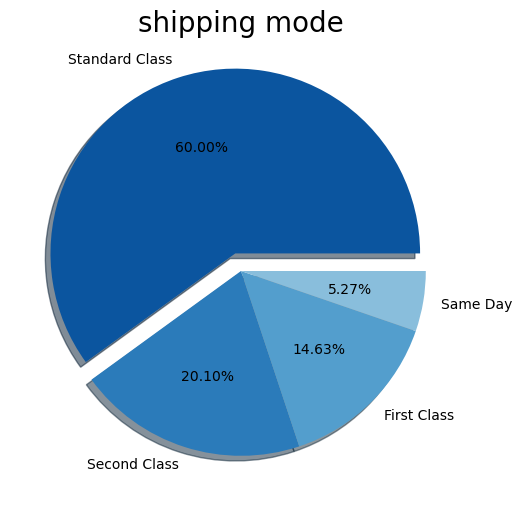

In [47]:
explode = [0.1, 0, 0, 0]
shipping_pie = data['ship_mode'].value_counts()/data.shape[0]
plt.figure(figsize=(8, 6))
plt.pie(shipping_pie.values, labels=shipping_pie.index, autopct='%1.2f%%', colors=mycolors,
       explode = explode, shadow = True)
plt.title("shipping mode", fontsize=20)
plt.show()

> - #### Most of the customers use "standard class" shipping option
> - #### However least use "same day" shipping option, it could be due to the high cost

## <a id='Segment'>2 | Segment</a>

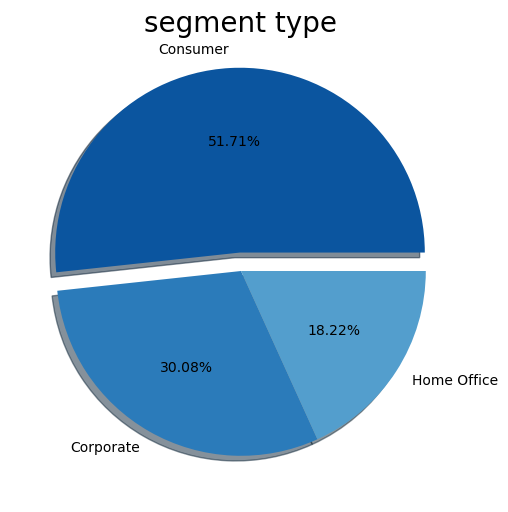

In [48]:
explode = [0.1, 0, 0]
segment_pie = data['segment'].value_counts()/data.shape[0]
plt.figure(figsize=(8, 6))
plt.pie(segment_pie.values, labels=segment_pie.index, autopct='%1.2f%%', colors=mycolors,
        explode = explode, shadow = True)
plt.title("segment type", fontsize=20)
plt.show()

> #### The majority of the customers are considered "Consumers"

## <a id='categories'>3 | categories & sub-categories</a>

What categories do we have?

In [49]:
data['category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

What is the most demanded product's category

Text(0, 0.5, 'category')

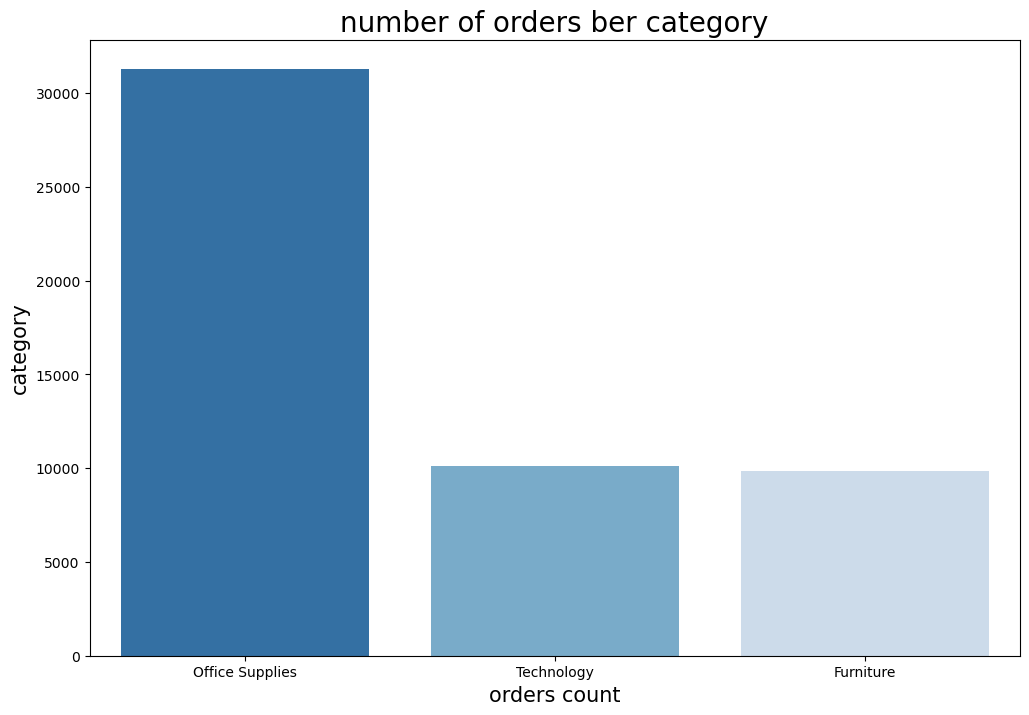

In [50]:
plt.figure(figsize=(12,8))
sns.countplot(x='category',data=data,order=data['category'].value_counts().index,palette='Blues_r')
plt.title("number of orders ber category", fontsize=20)
plt.xlabel("orders count", fontsize=15)
plt.ylabel("category", fontsize=15)

> - #### Most demanded category is the "*Office supplies*".....Tech and furniture aren't even close.

#### number of orders per Category for each shipping mood

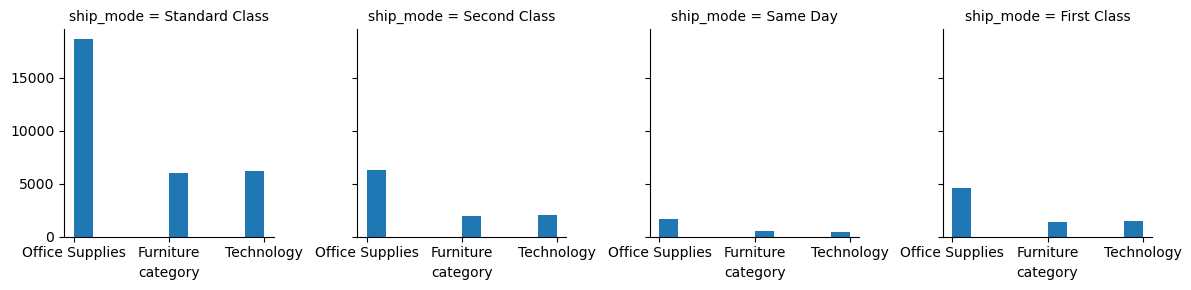

In [51]:
# Visualize the 'Category' column from the 'Ship Mode' column dataset standpoints.
#fig.set_size_inches(18.5, 10.5)
category_hist = sns.FacetGrid(data, col='ship_mode', palette=mycolors)
category_hist.map(plt.hist, 'category')

> - #### standard class' most orders are form office supplies same for second class, same day and first class. 
> - #### although we have a demand for office supplies the ammount ordered by each ship mood is not the sam, as we can see standard class is the most used shipping type.

#### profit per category

Text(0, 0.5, 'In millions')

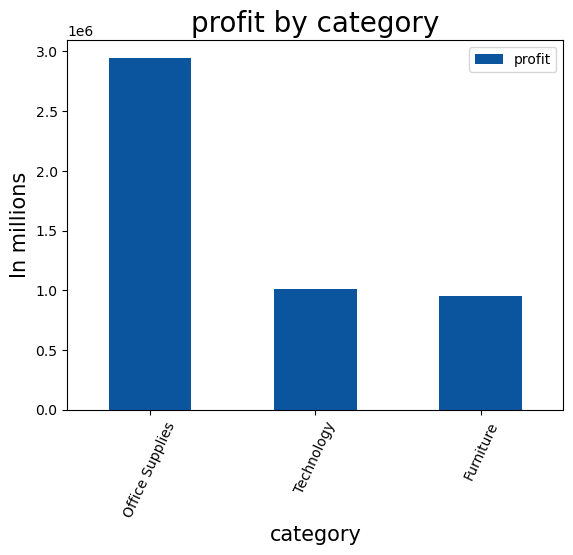

In [52]:
categorical_profits = data.groupby('category').sum()[['profit']].sort_values(by="profit",ascending=False).plot.bar(color=mycolors)
categorical_profits.plot(kind='bar',figsize=(16,5))
plt.xticks(rotation=65)
plt.title("profit by category", fontsize=20)
plt.xlabel("category", fontsize=15)
plt.ylabel("In millions", fontsize=15)

> #### Office supplies is the most Profitable Category as we expected

How many sub-categories do we have?

In [53]:
data["sub_category"].nunique()

17

What sub-categories do we have?

In [54]:
data["sub_category"].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Machines',
       'Appliances', 'Copiers', 'Chairs', 'Tables', 'Bookcases', 'Phones',
       'Accessories', 'Labels', 'Art', 'Envelopes', 'Fasteners',
       'Binders'], dtype=object)

what is the Number of orders in each sub-category?

In [55]:
data.sub_category.value_counts()

Binders        6152
Storage        5059
Art            4884
Paper          3538
Chairs         3434
Phones         3356
Furnishings    3171
Accessories    3074
Labels         2607
Envelopes      2440
Supplies       2426
Fasteners      2421
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          860
Name: sub_category, dtype: int64

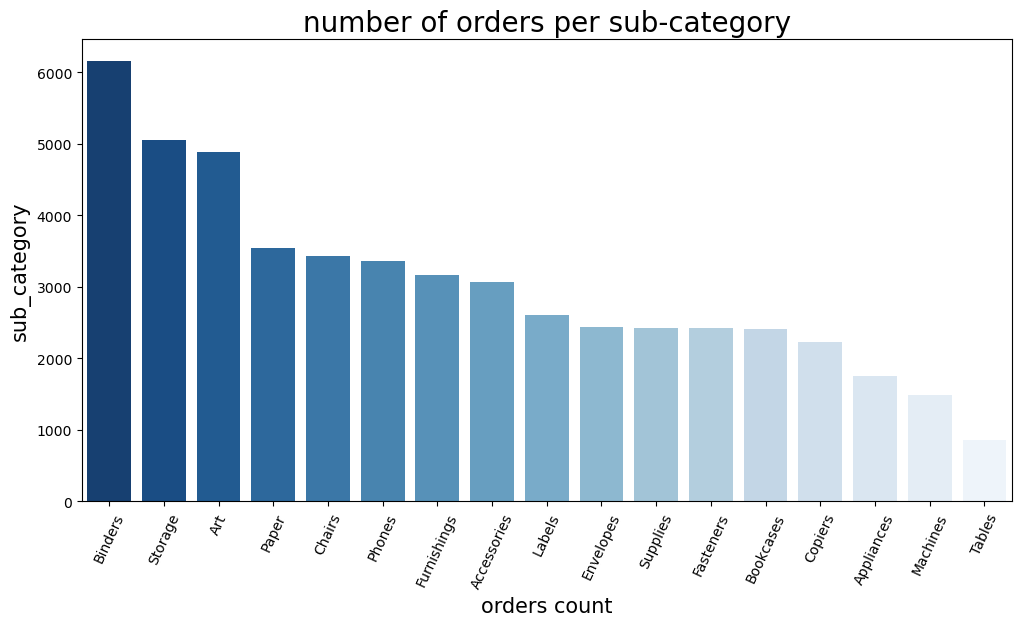

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['sub_category'],order=data['sub_category'].value_counts().index,palette='Blues_r')
plt.xticks(rotation=65)
plt.title("number of orders per sub-category", fontsize=20)
plt.xlabel("orders count", fontsize=15)
plt.ylabel("sub_category", fontsize=15)
plt.show()

> - #### Binders is the most ordered sub-category as shown

In [57]:
data.groupby(['category', 'sub_category']).count()[['id']]

id
category        sub_category      
Furniture       Bookcases     2411
                Chairs        3434
                Furnishings   3171
                Tables         860
Office Supplies Appliances    1755
                Art           4884
                Binders       6152
                Envelopes     2440
                Fasteners     2421
                Labels        2607
                Paper         3538
                Storage       5059
                Supplies      2426
Technology      Accessories   3074
                Copiers       2223
                Machines      1486
                Phones        3356

C:\Users\Marwan Makhlouf\AppData\Local\Temp\ipykernel_12936\3116364500.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('sub_category')['profit','sales'].agg(['sum']).plot.bar()


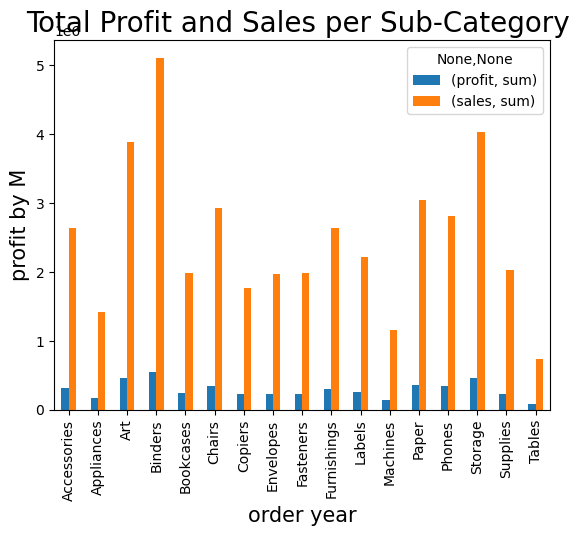

In [58]:
data.groupby('sub_category')['profit','sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category ', fontsize=20)
plt.xlabel("order year", fontsize=15)
plt.ylabel("profit by M", fontsize=15)
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

> - #### binders, arts, and storage are the top 3 sub-categories in terms of sales 
> - #### the three of them fall under the office supplies category which answers why office supplies are the demanded category in terms of profit and amount of orders in general and among the different types of shipping moods

## <a id='countries'>4 | countries</a>

How many countries are we dealing with?

In [59]:
data["country"].nunique()

147

> We have 147 countries currently

What are the countries are we dealing with?

In [60]:
data["country"].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Brazil', 'Mexico',
       'Cuba', 'Franze', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'El Salvador',
       'Denmark', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia',
       'Mongolia', 'Belgium', 'Kenya', 'Colombia', 'Estonia',
       'Madagascar', 'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Switzerland',
       'Moldova', 'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic O

> we'll plot the largest 10 by number of orders 

What are the Top 10 Consuming Countries?

In [61]:
data['country'].value_counts()[0:10]

United States     9998
Australia         2836
Franze            2826
Mexico            2643
Germany           2063
China             1880
United Kingdom    1633
Brazil            1603
India             1553
Indonesia         1393
Name: country, dtype: int64

> france isn't spllied right

In [62]:
# replacing franze with france
data['country'] = data['country'].replace(['Franze'], 'France')

In [63]:
# cheking if there any franze is the column
data[data['country'] == 'Franze']['country']

Series([], Name: country, dtype: object)

In [64]:
countries_count = data['country'].value_counts()[0:10]
countries_count 

United States     9998
Australia         2836
France            2826
Mexico            2643
Germany           2063
China             1880
United Kingdom    1633
Brazil            1603
India             1553
Indonesia         1393
Name: country, dtype: int64

> know this looks right

 firs lets take a look at the top countries by profit

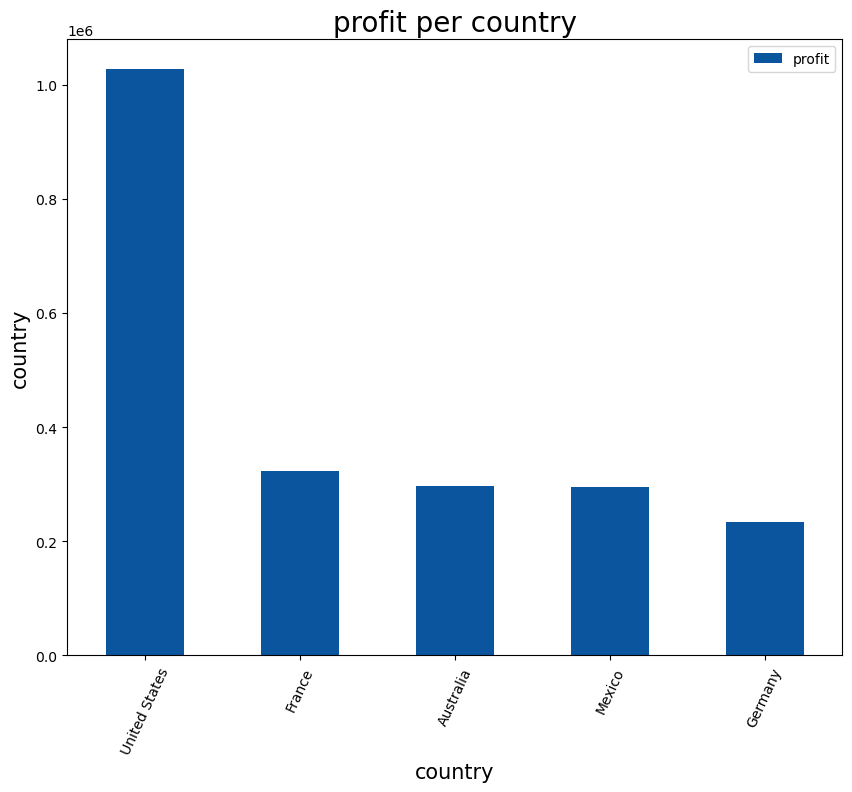

In [65]:
data.groupby(['country']).sum()[['profit']].sort_values(by="profit",ascending=False).nlargest(n=5,
                                        columns=['profit']).plot.bar(color=mycolors)
plt.xticks(rotation=65)
plt.title('profit per country', fontsize=20)
plt.xlabel('country', fontsize=15)
plt.ylabel('country', fontsize=15)
plt.show() 

> - #### definitely US is an outlier, a good one hopefully as it generates a the a significantly higher profit.

In [66]:
L1 = countries_count.index
L2 = countries_count.values

Text(0, 0.5, 'countries')

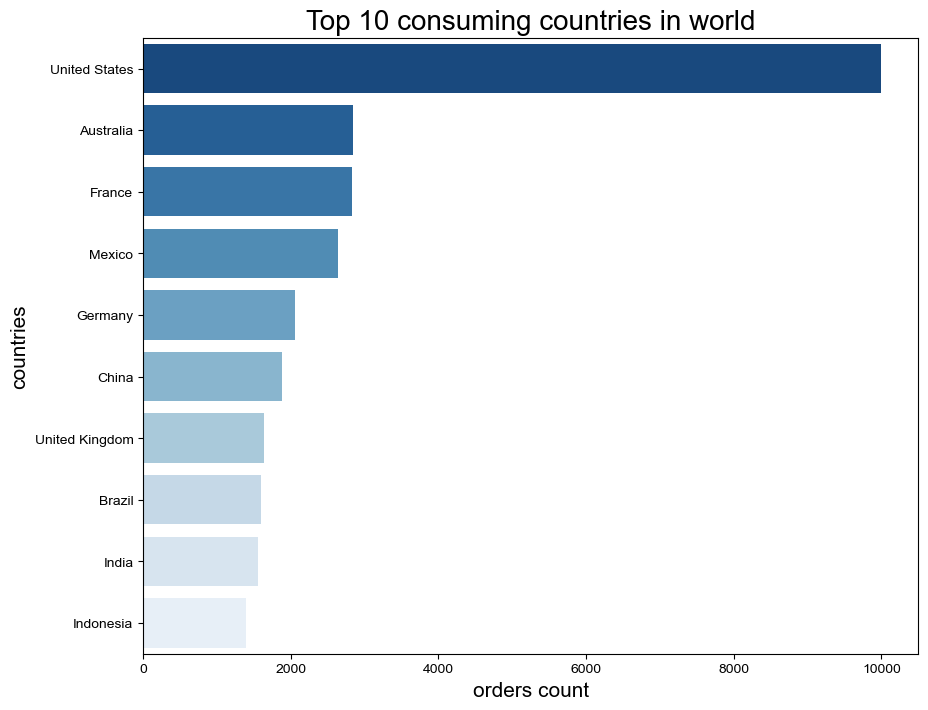

In [67]:
#plotting the top 10 countries
sns.barplot(x=L2,y=L1,palette='Blues_r')
sns.set_theme(style="darkgrid")
plt.title("Top 10 consuming countries in world", fontsize=20)
plt.xlabel("orders count", fontsize=15)
plt.ylabel("countries", fontsize=15)

> #### so Australia is in the second place in terms of the amount of orders placed, but it hasn't occure i the top 3 contries per profit (large amount of orders with a small unite price they do not spend much on products)
> #### Us is still at the top

In [68]:
print(f'num of orders from United states: {countries_count[0]}\nrepresents: only {(countries_count [0] / len(data)).round(2)} of the orders')

num of orders from United states: 9998
represents: only 0.19 of the orders


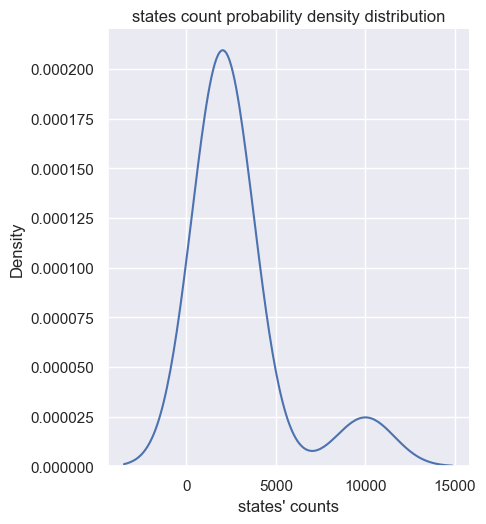

In [69]:
sns.displot(x = L2, kind="kde")
plt.title("states count probability density distribution")
plt.xlabel("states' counts")
plt.show()

> - #### defiantly US stands out from the other countries with almost 10000 orders, it creates a new peak determining a significantly different variance 
> - #### the other countries' count of orders variation is very close to each other except for the US as we discussed

#### Now lets look deeper in our top 3 countries: US,Australia,France

In [70]:
# Top 3 consumer countries:
df_US=data[data["country"]=="United States"]
df_Aus=data[data["country"]=="Australia"]
df_FR=data[data["country"]=="France"]

### <a id='US'>4.1 | First US:</a>

Text(0, 0.5, 'orders count')

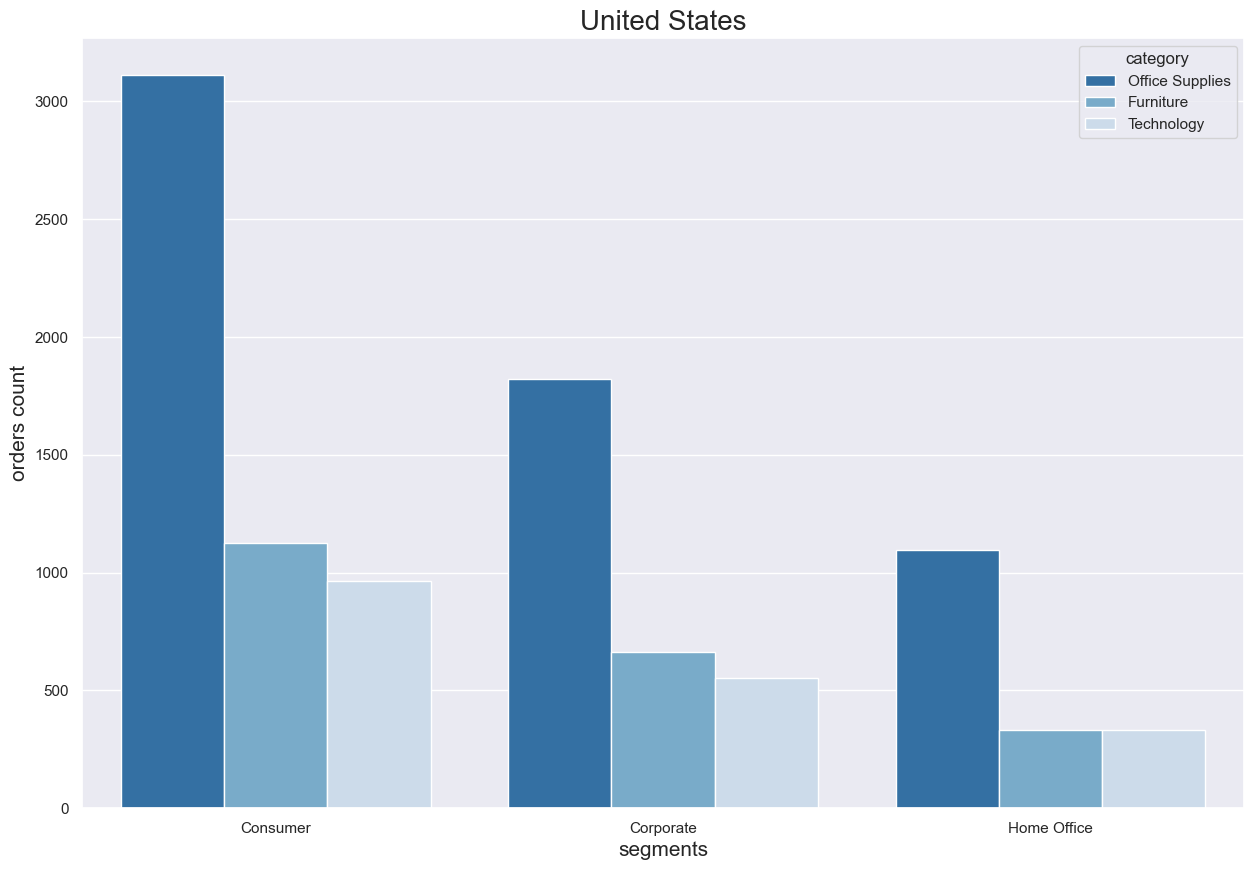

In [71]:
#What category is most demanded in each segment in "United States"?
plt.figure(figsize=(15,10))
plt.title("United States", fontsize=20)
sns.set_theme(style="darkgrid")
sns.countplot(x=df_US["segment"],hue=df_US["category"],order=data['segment'].value_counts().index,palette='Blues_r')
plt.xlabel("segments", fontsize=15)
plt.ylabel("orders count", fontsize=15)

>#### United States Customers mostly order office supplies

### <a id='Australia'>4.2 | second Australia </a>

Text(0, 0.5, 'orders count')

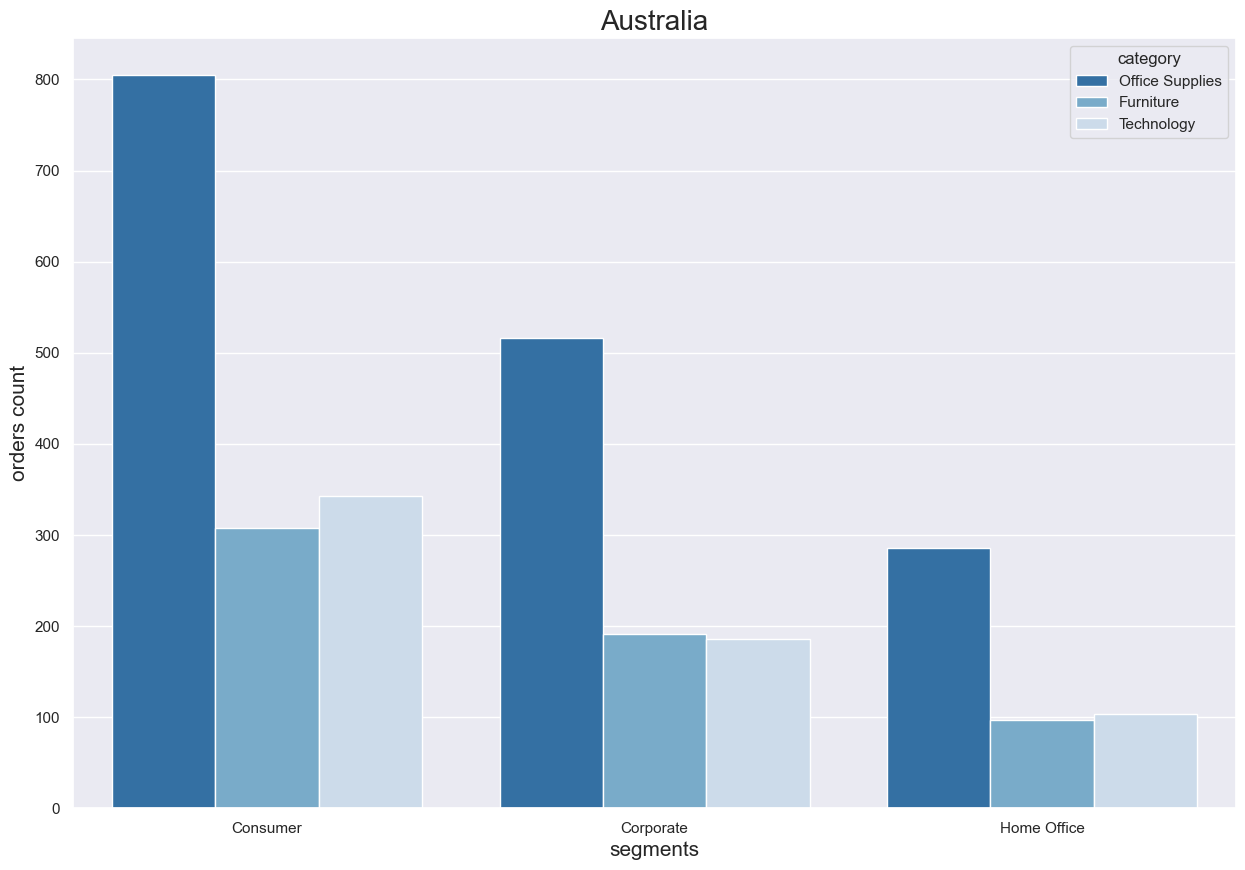

In [72]:
#What category is most demanded in each segment in "Australia"?
plt.figure(figsize=(15,10))
plt.title("Australia", fontsize=20)
sns.set_theme(style="darkgrid")
sns.countplot(x=df_Aus["segment"],hue=df_Aus["category"],order=data['segment'].value_counts().index,palette='Blues_r')
plt.xlabel("segments", fontsize=15)
plt.ylabel("orders count", fontsize=15)

> - #### Australia's Consumers mostly order office supplies then technology then furniture
> - #### While Corporates and home office segment mostly order office supplies then furniture then technology

### <a id='France'>4.3 | third France</a>

Text(0, 0.5, 'orders count')

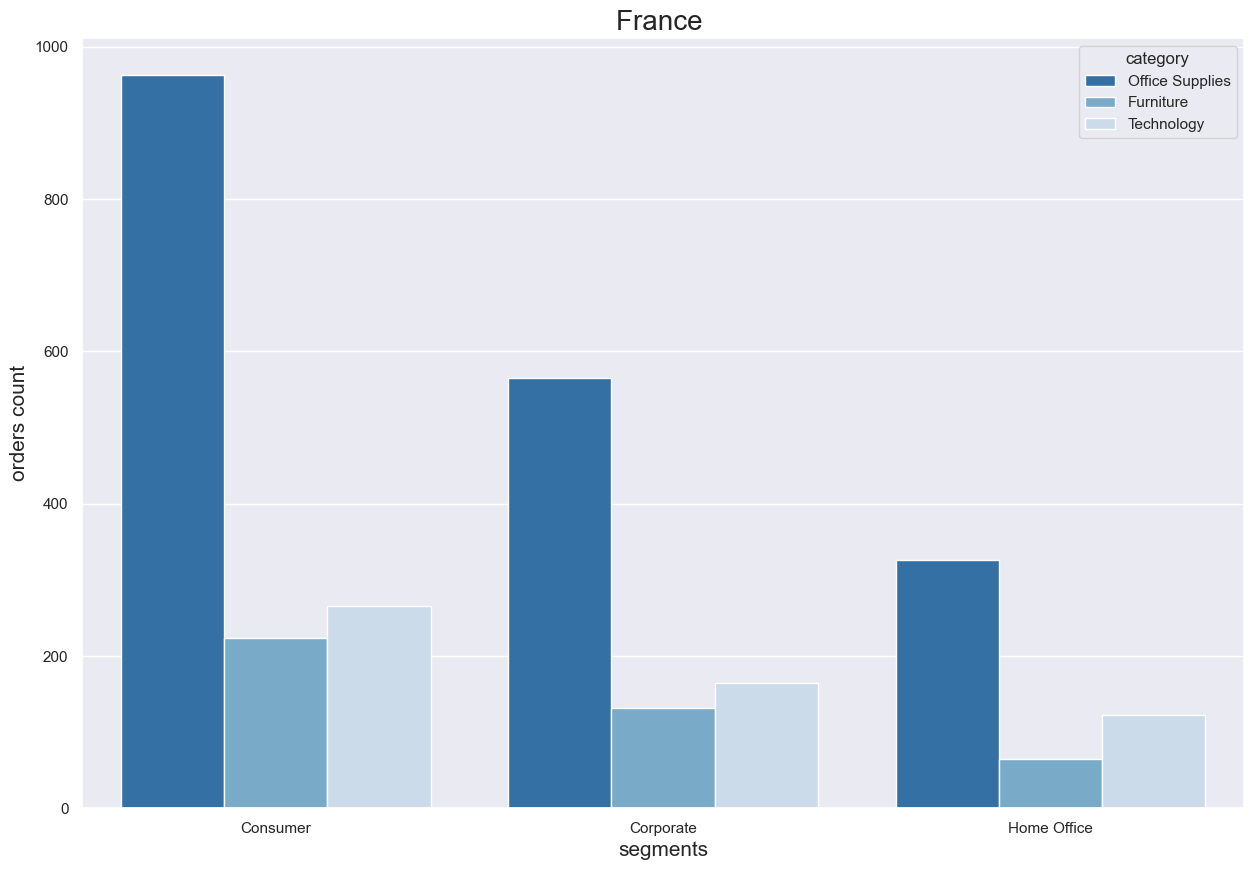

In [73]:
#What category is most demanded in each segment in "France"?
plt.figure(figsize=(15,10))
plt.title("France ", fontsize=20)
sns.set_theme(style="darkgrid")
sns.countplot(x=df_FR["segment"],hue=df_FR["category"],order=data['segment'].value_counts().index,palette='Blues_r')
plt.xlabel("segments", fontsize=15)
plt.ylabel("orders count", fontsize=15)

> - #### Australia's diffirent segments mostly order office supplies then technology then furniture

## <a id='state'>5 | state</a>

How many states are we dealing with?

In [74]:
data["state"].nunique()

1094

What are these states ?

In [75]:
data["state"].unique()

array(['Constantine', 'New South Wales', 'Budapest', ..., 'Karaman',
       'Sikasso', 'Atsimo-Andrefana'], dtype=object)

since there are a lot than can't be traked by the paired ayes we'll jist get the top 10 in occerness

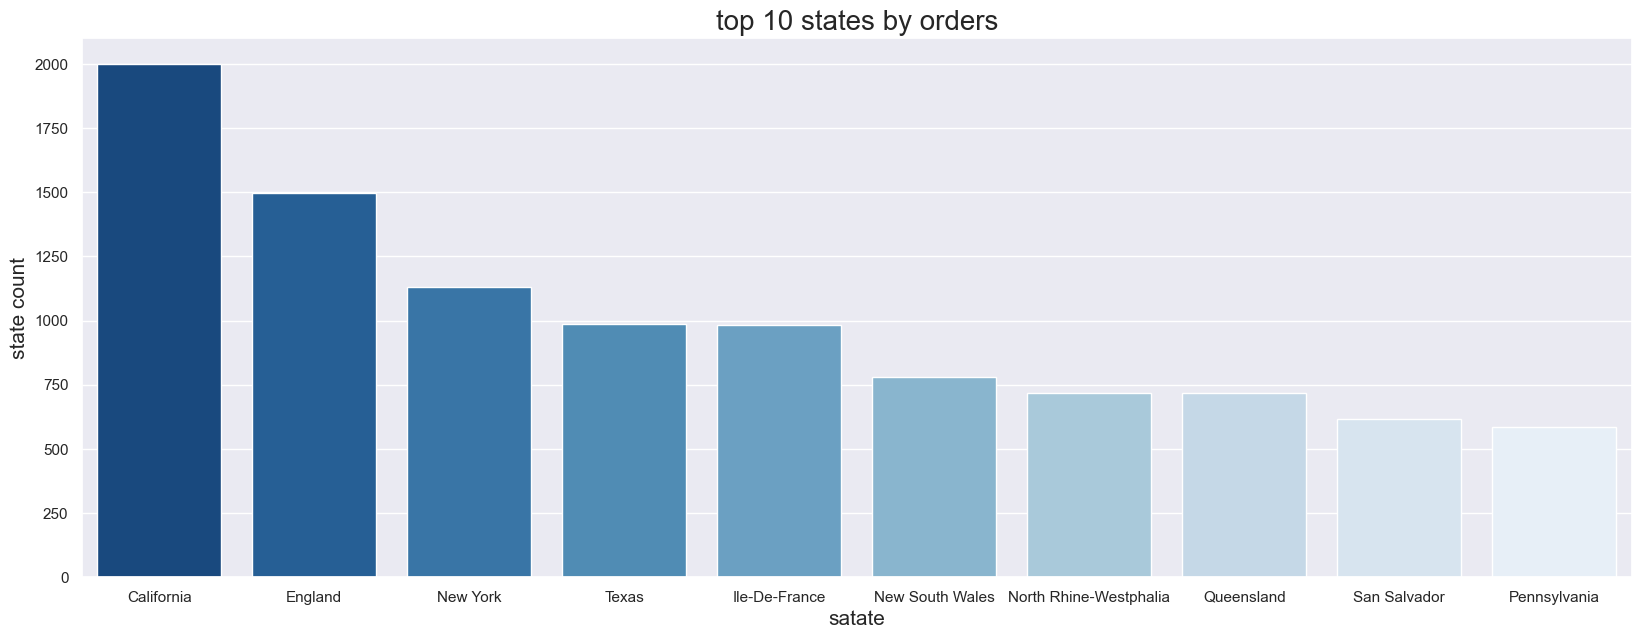

In [76]:
state_count = data["state"].value_counts().head(10)
x = state_count.index
y = state_count.values

plt.figure(figsize=(20, 7))
sns.barplot(x = x, y = y, palette='Blues_r')
plt.title('top 10 states by orders', fontsize=20)
plt.ylabel("state count", fontsize=15)
plt.xlabel("satate", fontsize=15)
plt.show()

how much orders do we get from california ?

In [77]:
print(f'num of orders from California: {state_count[0]}\nrepresents: only {(state_count[0] / len(data)).round(2)} of the orders')

num of orders from California: 2000
represents: only 0.04 of the orders


In [78]:
#getting the mean
state_count.mean()

1001.6

In [79]:
#getting the median
state_count.median()

881.5

> looks like our distribution is skewed

We'll plot a PDF function for states' counts 

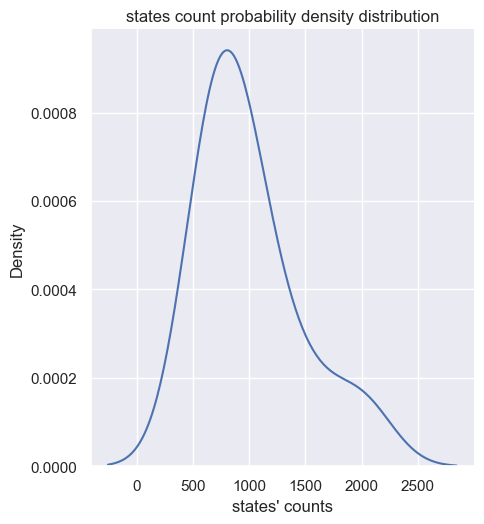

In [80]:
sns.displot(x = y, kind="kde")
plt.title("states count probability density distribution")
plt.xlabel("states' counts")
plt.show()

>state orders count are <b>almost normally distributed</b> with a small peak at 2000, due to the high number of orders got from California. Although plotting the highest 10 states with orders shows that California is heighest we needed to see the full picture, California's orders  only represent 4% of the orders (the largest amount ever ordered were 2000 ordres -> 4% )
the other 49297 orders are normally distributed among the other  1093 states.

## <a id='markets'>6 | markets</a>

In [81]:
#How many markets are we selling at?
data["market"].nunique()

7

In [82]:
#Which markets are we selling at?
data["market"].unique()

array(['Africa', 'Apac', 'Emea', 'Eu', 'Canada', 'Latam', 'Us'],
      dtype=object)

In [83]:
markets = data["market"].value_counts()
markets

Apac      11001
Latam     10299
Us         9998
Eu         9995
Emea       5031
Africa     4589
Canada      384
Name: market, dtype: int64

### <a id='orders'>6.1 | count of orders per market</a>

In [84]:
market_x = markets.index
market_y = markets.values
market_cdf = markets.cumsum()/markets.sum()*100

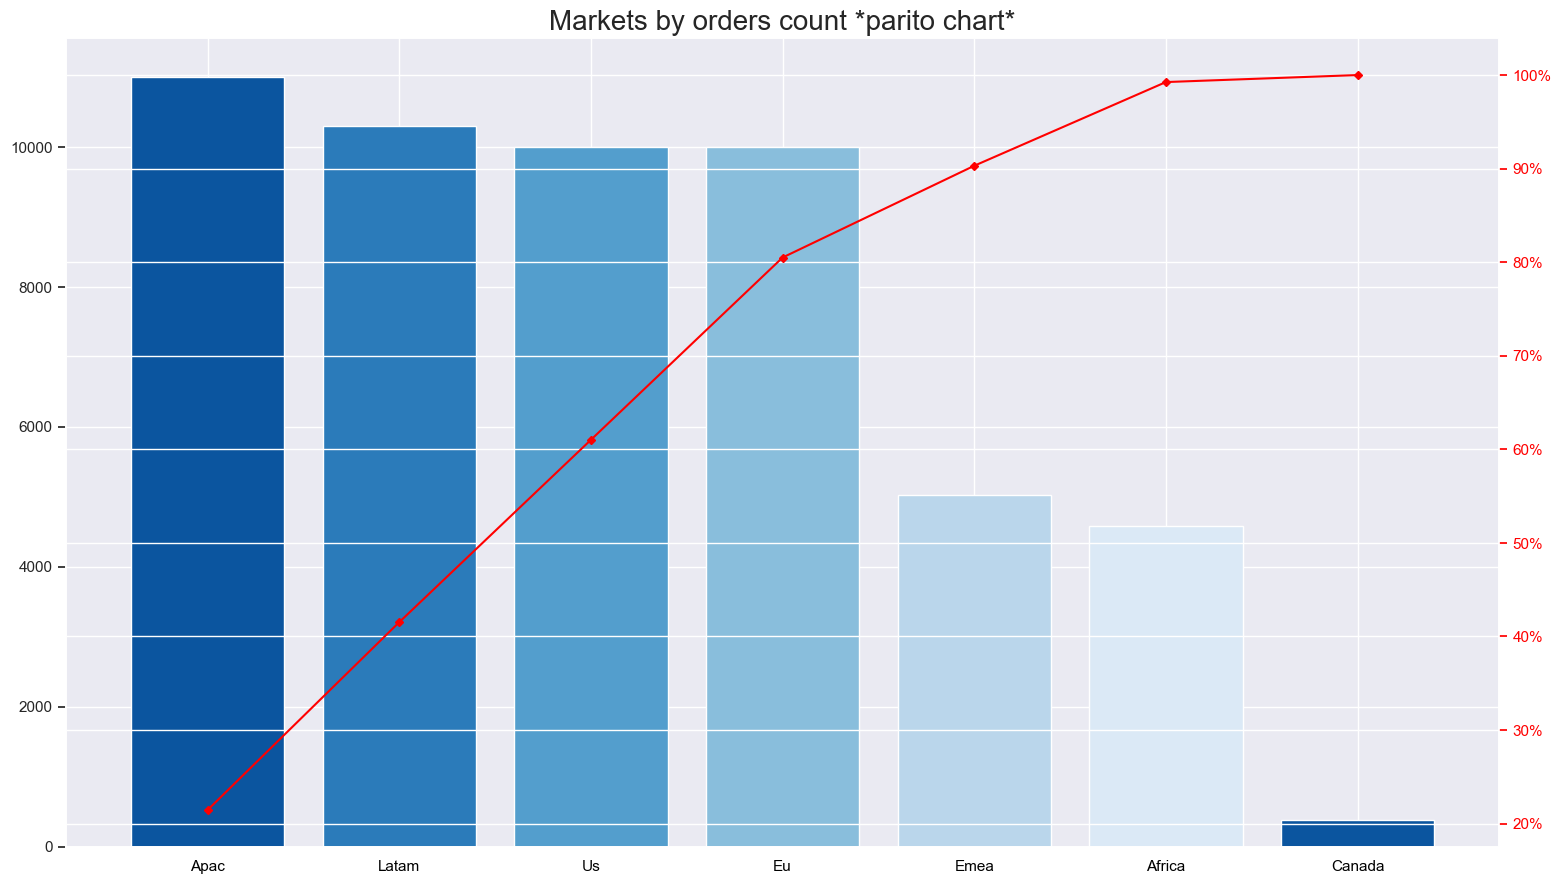

In [85]:
#define aesthetics for plot
color1 = mycolors
color2 = 'red'
line_size = 4

#calculationg CDF
market_cdf = market_y.cumsum()/market_y.sum()*100

#create basic bar plot
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.bar(market_x, market_y, color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(market_x, market_cdf, color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
plt.title("Markets by orders count *parito chart*", fontsize=20)
ax.tick_params(axis='x', colors="black")
ax2.tick_params(axis='y', colors=color2)

plt.show()

In [86]:
# what is the cumsum of africa representedd in the chart ?
Eu_cumsum = market_cdf[3]
Eu_cumsum

80.49788486656139

In [87]:
# how much cumsum does the rest represents?
100 - Eu_cumsum

19.502115133438608

> - #### Apac was our top market in the amount of orders between the year 2011-2014
> - #### 80.49% of our orders are from (Apac, Latam, Us, Eu) respectively
> - #### (canada, Emea, Africa) markets represent only 19.5% of our orders which is very small

###  <a id='profit'>6.2 | what about profit per market</a>

In [88]:
market_profits = data.groupby('market').sum()[['profit']].sort_values(by="profit",ascending=False)
market_profits

,profit
market,
Apac,1.137407e+06
Eu,1.080203e+06
Latam,1.062022e+06
Us,1.028176e+06
Emea,2.958958e+05
Africa,2.827033e+05
Canada,2.851636e+04


In [89]:
marketpro_x = market_profits.index
marketpro_y = list(market_profits["profit"].values.round())
marketpro_cdf = market_profits.cumsum()/market_profits.sum()*100

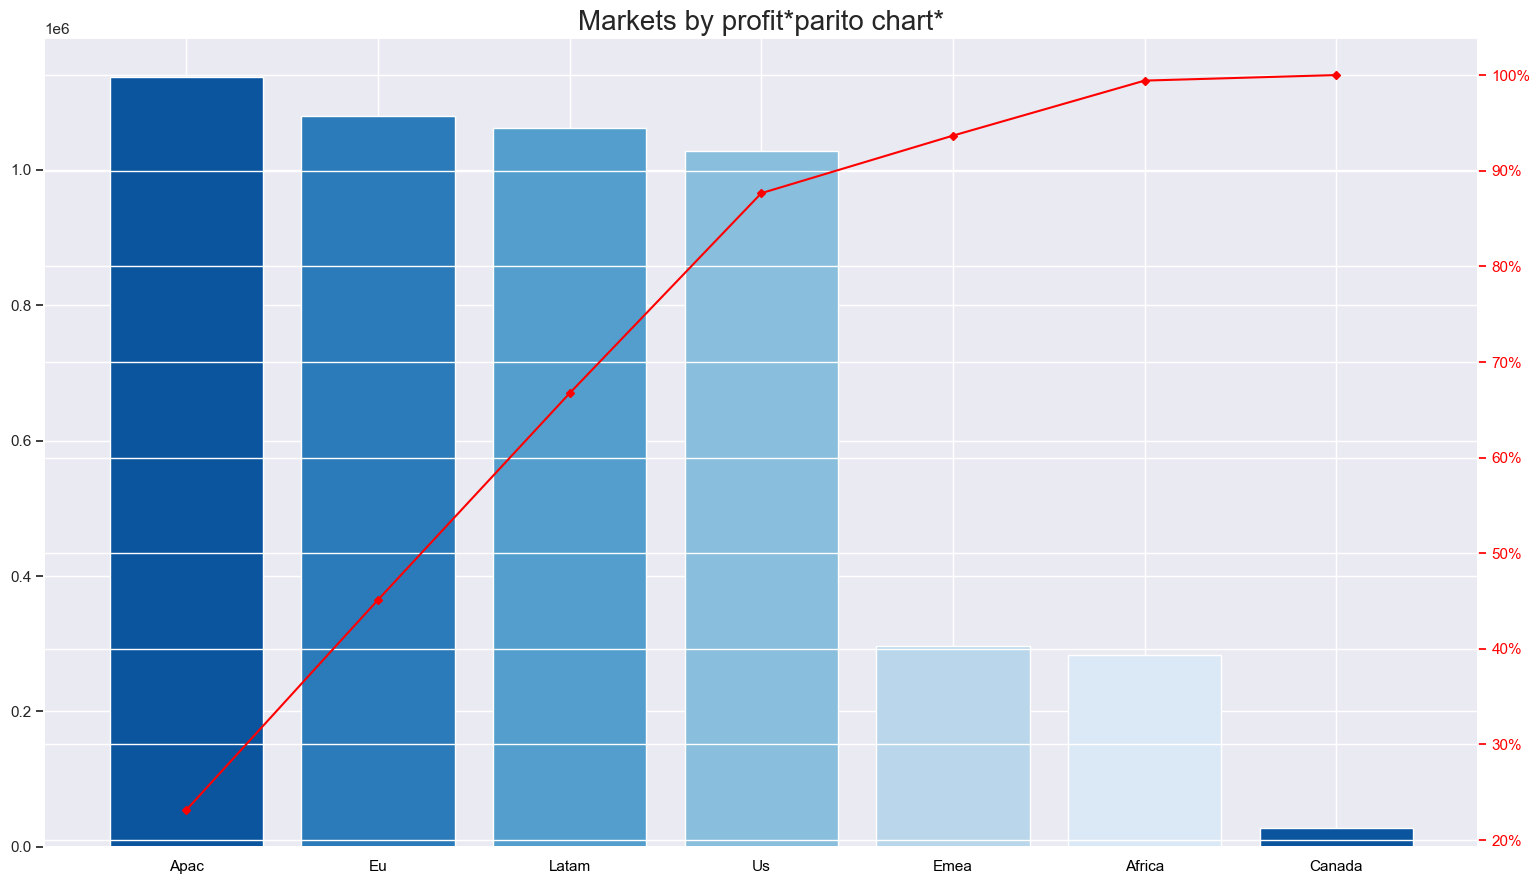

In [90]:
#Which market is the most profitable?
#define aesthetics for plot
color1 = mycolors
color2 = 'red'
line_size = 4

#calculationg CDF
marketpro_cdf = np.array(marketpro_y).cumsum()/np.array(marketpro_y).sum()*100

#create basic bar plot
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.bar(marketpro_x, marketpro_y, color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(marketpro_x, marketpro_cdf, color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
plt.title("Markets by profit*parito chart*", fontsize=20)
ax.tick_params(axis='x', colors="black")
ax2.tick_params(axis='y', colors=color2)

plt.show()

In [91]:
marketp = marketpro_cdf[3]
marketp

87.64751757046855

In [92]:
rest  = 100 - marketp
rest

12.352482429531449

> - #### about 87.6% of our profit comes from Apac, Eu, Latam and US
> - #### while the other 3 markets Africa Emea canada only represents 12.4%

lets compare profit with market

C:\Users\Marwan Makhlouf\AppData\Local\Temp\ipykernel_12936\1355683600.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('market')['profit','sales'].agg(['sum']).plot.bar()


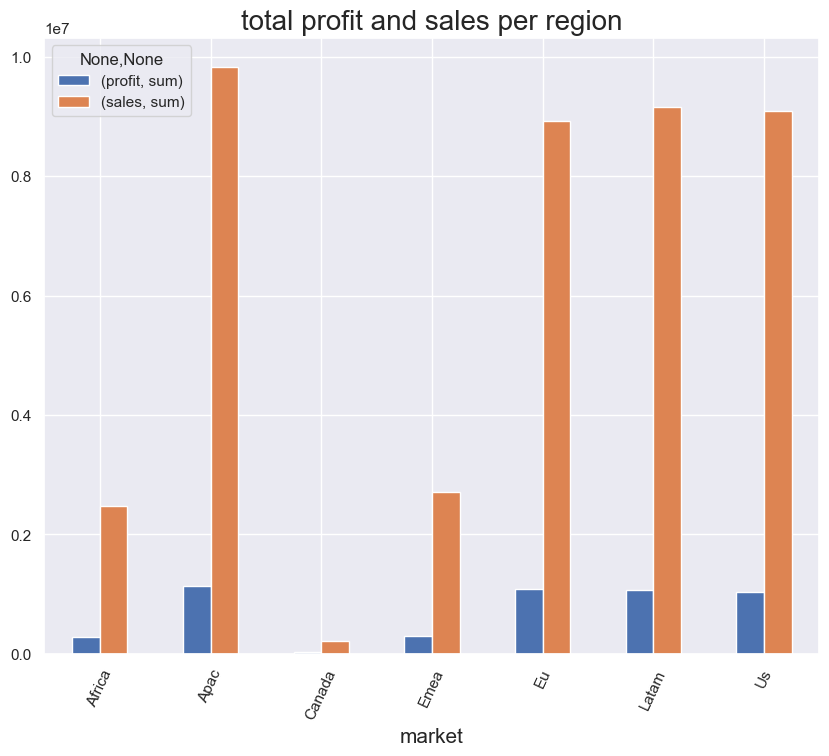

In [93]:
data.groupby('market')['profit','sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per market')
plt.rcParams['figure.figsize'] = [10,8]
plt.title("total profit and sales per region", fontsize=20)
plt.xlabel("market", fontsize=15)
plt.xticks(rotation=65)
#plt.ylabel(, fontsize=15)
plt.show()

In [94]:
EM = data[data['region'] == 'Emea']['sales'].median()
Am = data[data['region'] == 'Africa']['sales'].median()

In [95]:
print(f'Emea median sales: {EM}\nAfrica median sales: {Am}')

Emea median sales: 344.0
Africa median sales: 340.0


> - #### Althogh Africa, Emea and canada represents 19.5% of the orders they only produce 12.53% of our sales 
> - #### Emea is lower than Africa on profit as we saw in the previous parito chart although Emea number of orders is greater than Africa as well as the total and average sales got from Emea
> - #### to conclude Emea profits do not represent the total orders and sales produced from it, so we should stop selling to them as their sales aren't profitabl

## <a id='Region'>7 | Region</a>

In [96]:
#How many regions are we selling at?
data["region"].nunique()

13

In [97]:
#What regions are we selling at?
data["region"].unique()

array(['Africa', 'Oceania', 'Emea', 'North', 'Canada', 'Southeast Asia',
       'Central', 'South', 'Caribbean', 'North Asia', 'East', 'West',
       'Central Asia'], dtype=object)

In [98]:
regions = data["region"].value_counts()

In [99]:
regions_x = regions.index
regions_y = regions.values
regions_cdf = regions_y.cumsum()/regions_y.sum()*100

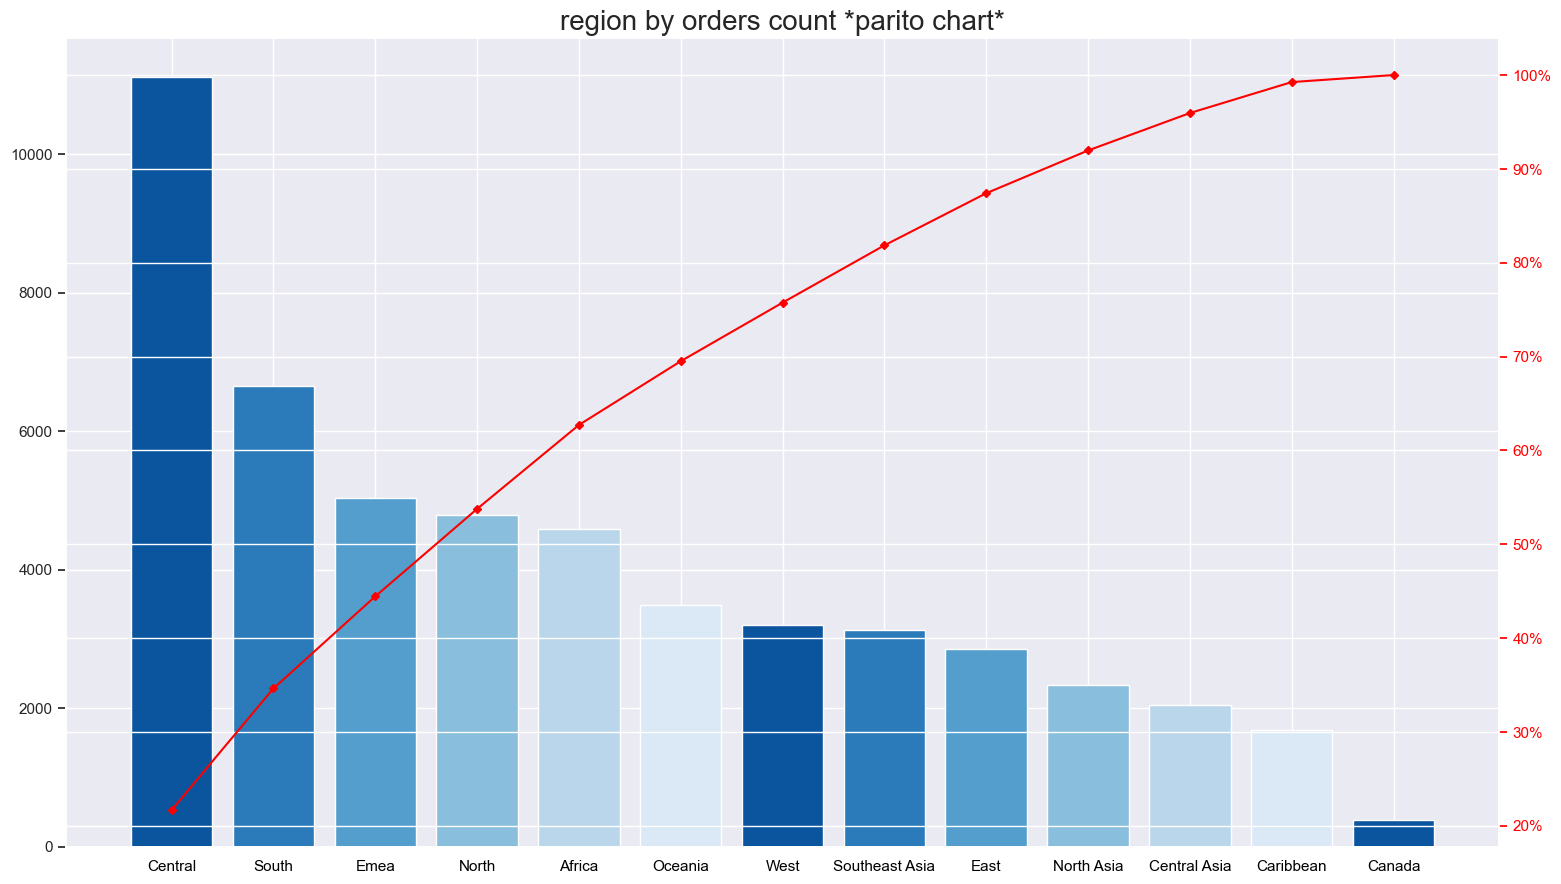

In [100]:
#define aesthetics for plot
color1 = mycolors
color2 = 'red'
line_size = 4

#calculationg CDF
market_cdf = regions_y.cumsum()/regions_y.sum()*100

#create basic bar plot
fig, ax = plt.subplots()

ax.bar(regions_x, regions_y, color=color1)
fig.set_size_inches(18.5, 10.5)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(regions_x, market_cdf, color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
plt.title("region by orders count *parito chart*", fontsize=20)
ax.tick_params(axis='x', colors="black")
ax2.tick_params(axis='y', colors=color2)

plt.show()

In [101]:
# precentage of the central market's number of orders
central_cumsum = market_cdf[0]
central_cumsum

21.669883229038735

In [102]:
# precentage of canada market's number of orders 
canada_portion = market_cdf[-1] - market_cdf[-2]
canada_portion

0.7485817884086714

> - #### central region alone ordered 21.67% of our oderes between the year 2011-2014
> - #### canada still the samllest on the amount of orders

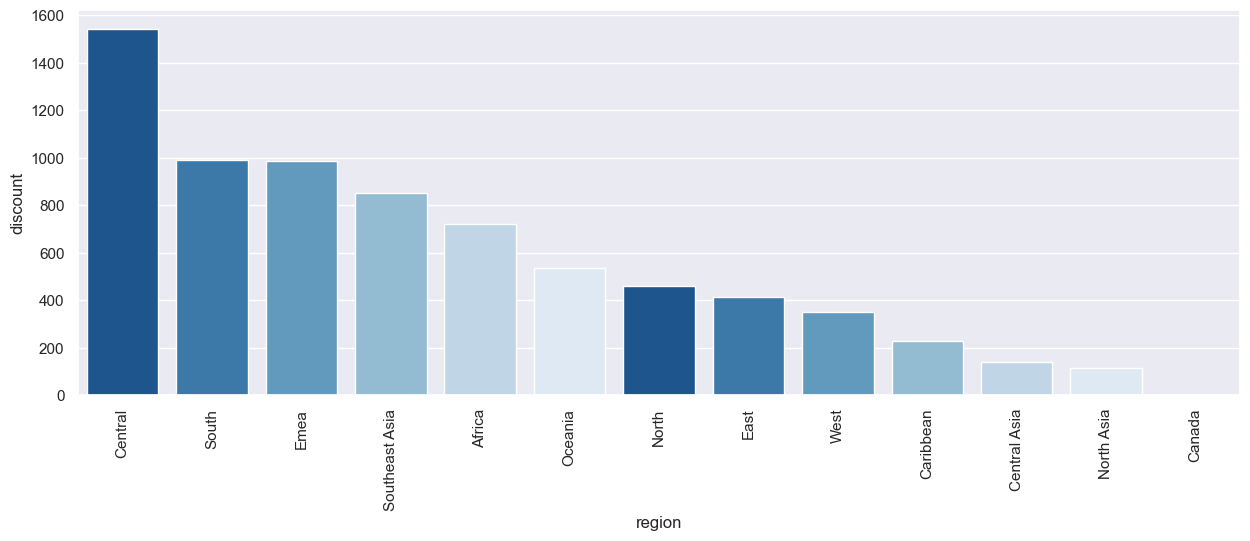

In [103]:
#Where are the regions that give most discounts?
regions= data.groupby(['region']).sum().sort_values('discount', ascending=False)
regions.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='region', y='discount', data=regions, palette=mycolors)
plt.xticks(rotation=90)
plt.show();

> - #### central got the largest total discount which is resonable as it was our demanded region 
> - #### in contrast canada haven't got any discounts

C:\Users\Marwan Makhlouf\AppData\Local\Temp\ipykernel_12936\494533356.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('region')['profit','sales'].agg(['sum']).plot.bar()


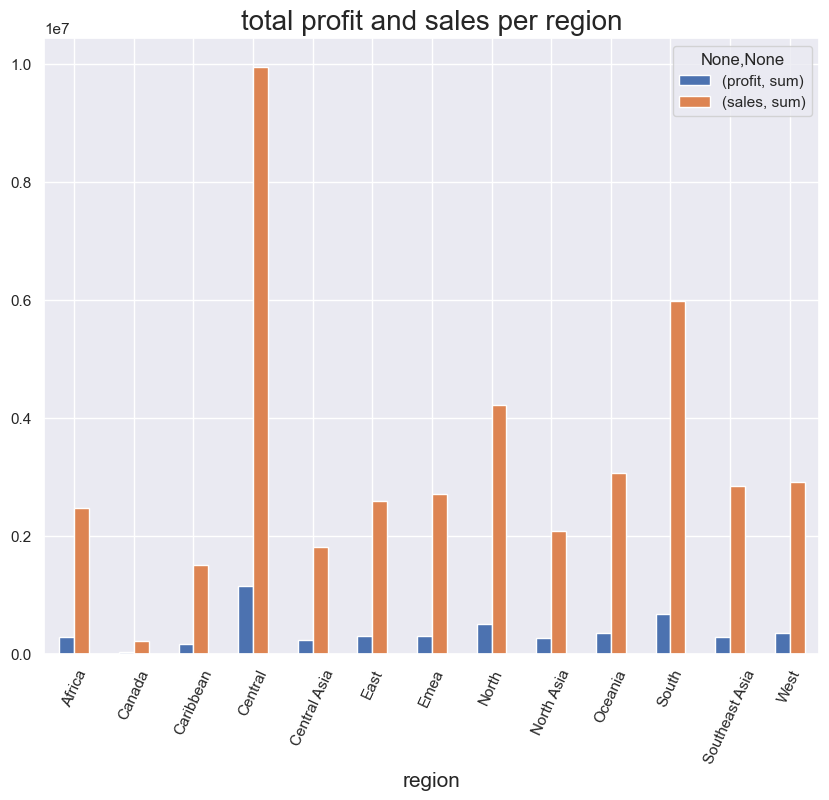

In [104]:
data.groupby('region')['profit','sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per region')
plt.rcParams['figure.figsize'] = [10,8]
plt.title("total profit and sales per region", fontsize=20)
plt.xlabel("region", fontsize=15)
plt.xticks(rotation=65)
#plt.ylabel(, fontsize=15)
plt.show()

> - #### Central, South and North region respectively produces the largest profits as well as sales
> - #### while canada region does not seem to have a noticeable profit 
> - #### we can also motice that Emea and canada salles still aren't profitable
> - #### africa does not seem to producea good profit compairing to the other regions with almost the same amount of sales

## <a id='Growth'>8 | Growth of Superstore Sales over the year 2011-2014?</a>

What are the years that our dataset contains?

In [105]:
data["year_order"].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

In [106]:
#just sorting data by year
df_1=data.sort_values(by=["year_order"],ascending=True)

How many orders in each year?

In [107]:
df_2011=df_1[df_1["year_order"]==2011]["quantity"].sum()
df_2012=df_1[df_1["year_order"]==2012]["quantity"].sum()
df_2013=df_1[df_1["year_order"]==2013]["quantity"].sum()
df_2014=df_1[df_1["year_order"]==2014]["quantity"].sum()
df_2011, df_2012,df_2013,df_2014

(31467, 38111, 48168, 60559)

Text(0.5, 1.0, 'Growth of the Store')

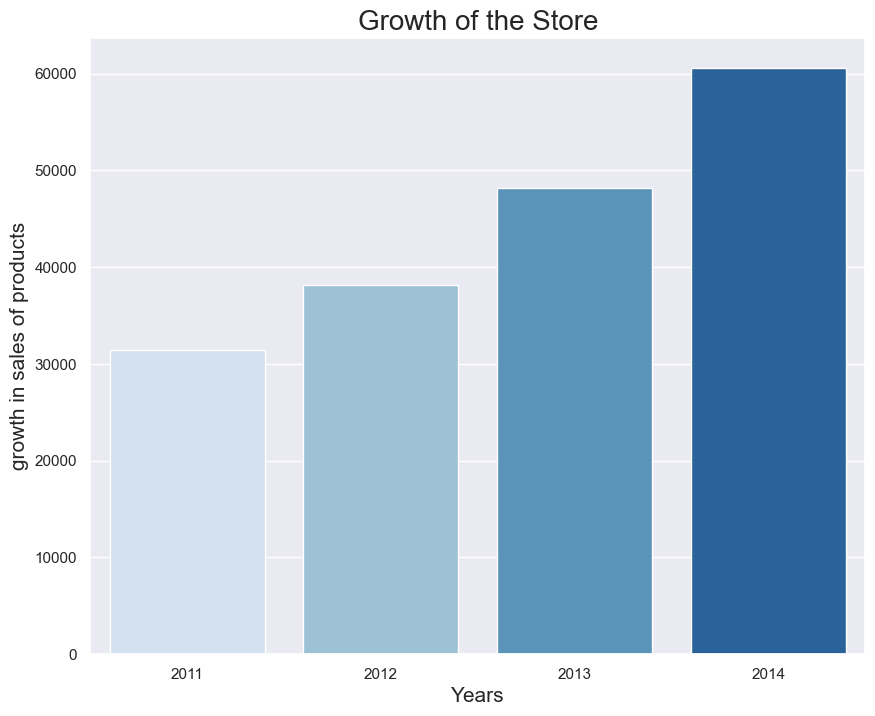

In [108]:
#How many orders in each year?
S1=[2011,2012,2013,2014]
S2=[31443,38111,48136,60622]
sns.barplot(x=S1,y=S2,palette='Blues')
fig.set_size_inches(18.5, 10.5)
plt.xlabel("Years", fontsize=15)
plt.ylabel("growth in sales of products", fontsize=15)
plt.title("Growth of the Store", fontsize=20)

C:\Users\Marwan Makhlouf\AppData\Local\Temp\ipykernel_12936\263262911.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('year_order')['profit','sales'].agg(['sum']).plot.bar()


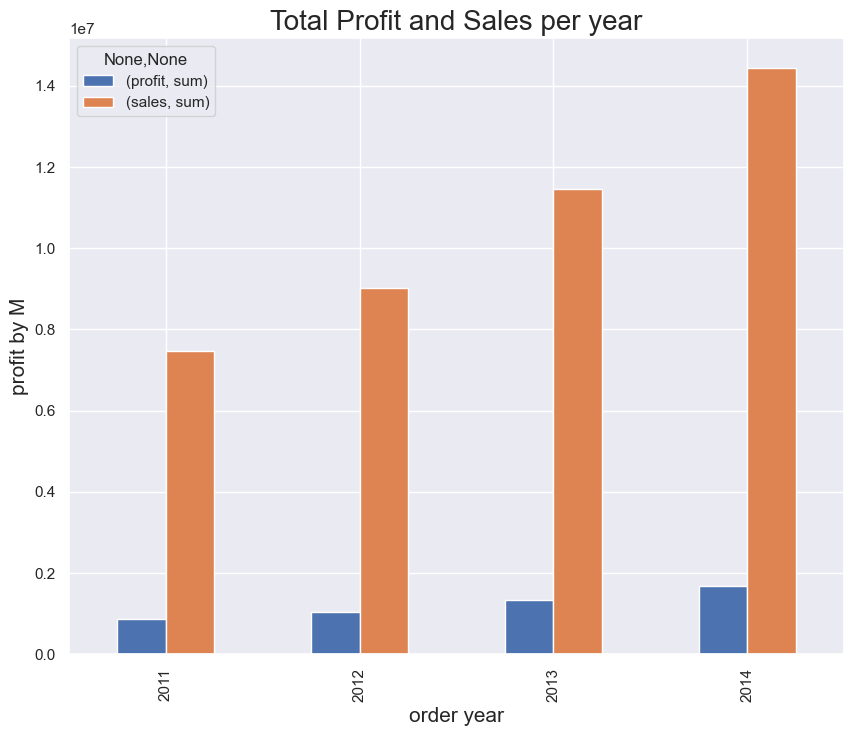

In [109]:
data.groupby('year_order')['profit','sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per year', fontsize=20)
plt.xlabel("order year", fontsize=15)
plt.ylabel("profit by M", fontsize=15)
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

> we can notice a groing trend in sales and profits over years as well

#### but what about months trend?

Text(0, 0.5, 'order count')

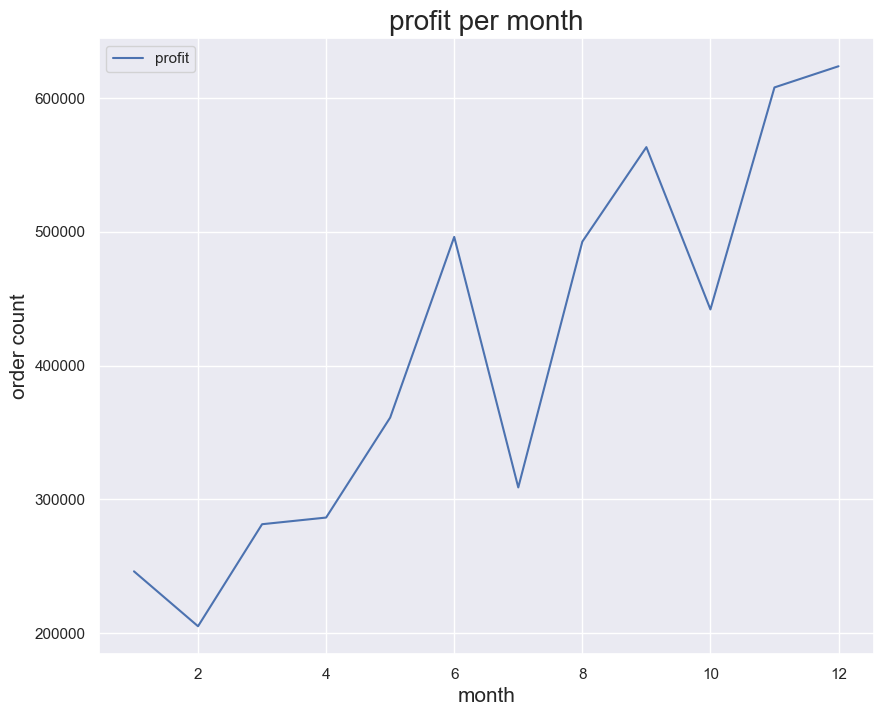

In [110]:
sns.lineplot(data.groupby(['month_order']).sum()[['profit']])
plt.title("profit per month", fontsize=20)
plt.xlabel("month", fontsize=15)
plt.ylabel("order count", fontsize=15)

Text(0, 0.5, 'order count')

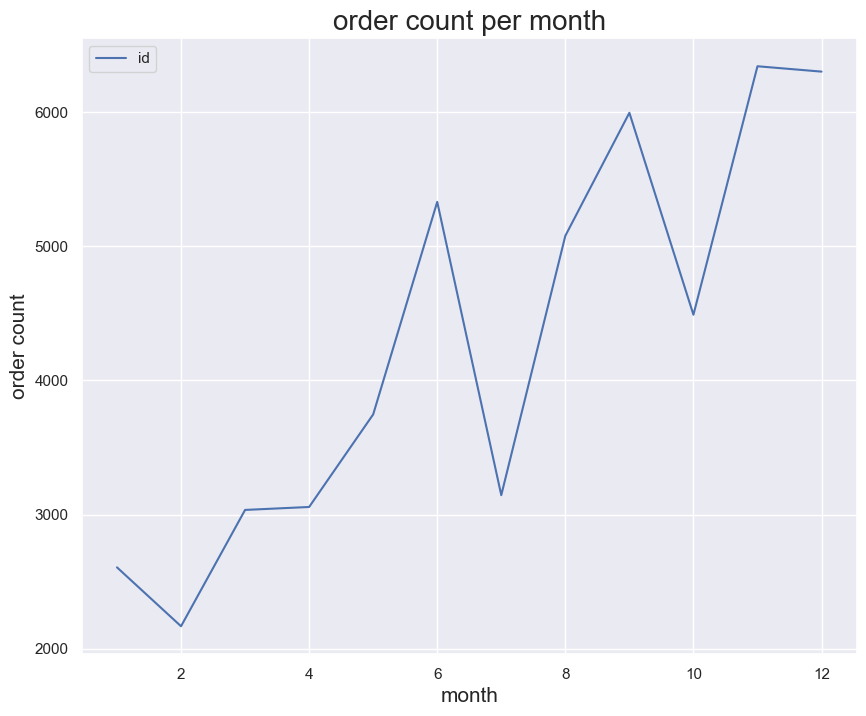

In [111]:
sns.lineplot(data.groupby(['month_order']).count()[['id']])
plt.title("order count per month", fontsize=20)
plt.xlabel("month", fontsize=15)
plt.ylabel("order count", fontsize=15)

#### profit and orders quantity are following almost the same trend which indicates
 > - A <b>raise</b> at the end of the year in 11 *November* and 12 *December* as we approach Christmas in December as well as thanksgiving November inaddition to the other several  occasions occurs in these two months all over the world
 > - our number of orders and so sales and profit <b>drops</b> at the beginning of each year because customers spend most of their money at occasions occurred at the end of the previous year that's why our sales drop at the beginning of each year
 > - we can also notice a <b>raise</b> in orders as well as profit in both june and september
 > - a <b>drop</b> in october and july

In [112]:
months_data_m = data.groupby(['month_order']).sum()
months_data = months_data_m[['Unit_Price', 'quantity', 'discount', 'shipping_cost', 'sales',
       'expenses', 'revenue', 'profit']]
months_data

,Unit_Price,quantity,discount,shipping_cost,sales,expenses,revenue,profit
month_order,,,,,,,,
1,623058,8904,375.760,69914.10,2136725,1.647889e+06,1894125.850,246236.36050
2,513980,7343,303.368,61135.92,1738961,1.373311e+06,1578517.846,205207.31998
3,722778,10342,441.832,75996.84,2441805,1.883576e+06,2165029.972,281453.89636
4,715176,10587,439.466,75743.34,2477141,1.916907e+06,2203341.674,286434.41762
5,897641,13137,562.458,99934.91,3129086,2.416896e+06,2778040.844,361145.30972
6,1267188,17994,794.204,136648.43,4305828,3.320461e+06,3816622.074,496160.86962
7,755502,11095,461.562,82115.54,2660720,2.067540e+06,2376483.332,308942.83316
8,1222865,17518,678.588,136694.78,4208844,3.296598e+06,3789192.592,492595.03696
9,1407903,20618,820.382,152129.27,4823564,3.769355e+06,4332591.458,563236.88954


In [113]:
# our profit droped at the biggining of the year by 
dropp = (((months_data.iloc[11]['profit'] - months_data[:1]['profit'])/ months_data.iloc[11]['profit']) * 100).round(2)
drop = list(dropp)[0]
# and rase at the end by  by the begining of Novamber
raises = (((months_data.iloc[10]['profit'] - months_data.iloc[9]['profit'])/ months_data.iloc[10]['profit']) * 100).round(2)

In [114]:
print(f'our profit dropped at the beginning of the year by:{drop}\nAnd raise at the end by by the beginning of November by:{raises}')

our profit dropped at the beginning of the year by:60.52
And raise at the end by by the beginning of November by:27.29


## <a id='Products'>9 | Products</a>

In [115]:
#What are the top 10 most selling Products and what is the quantity sold exactly?
top_sp=pd.DataFrame(data.groupby(['product_name']).sum()['quantity'])


In [116]:
products_x = top_sp.sort_values('quantity',ascending=False)[:10].index
products_y = list(top_sp.sort_values('quantity',ascending=False)["quantity"][:10].values)

Text(0.5, 0, 'product name')

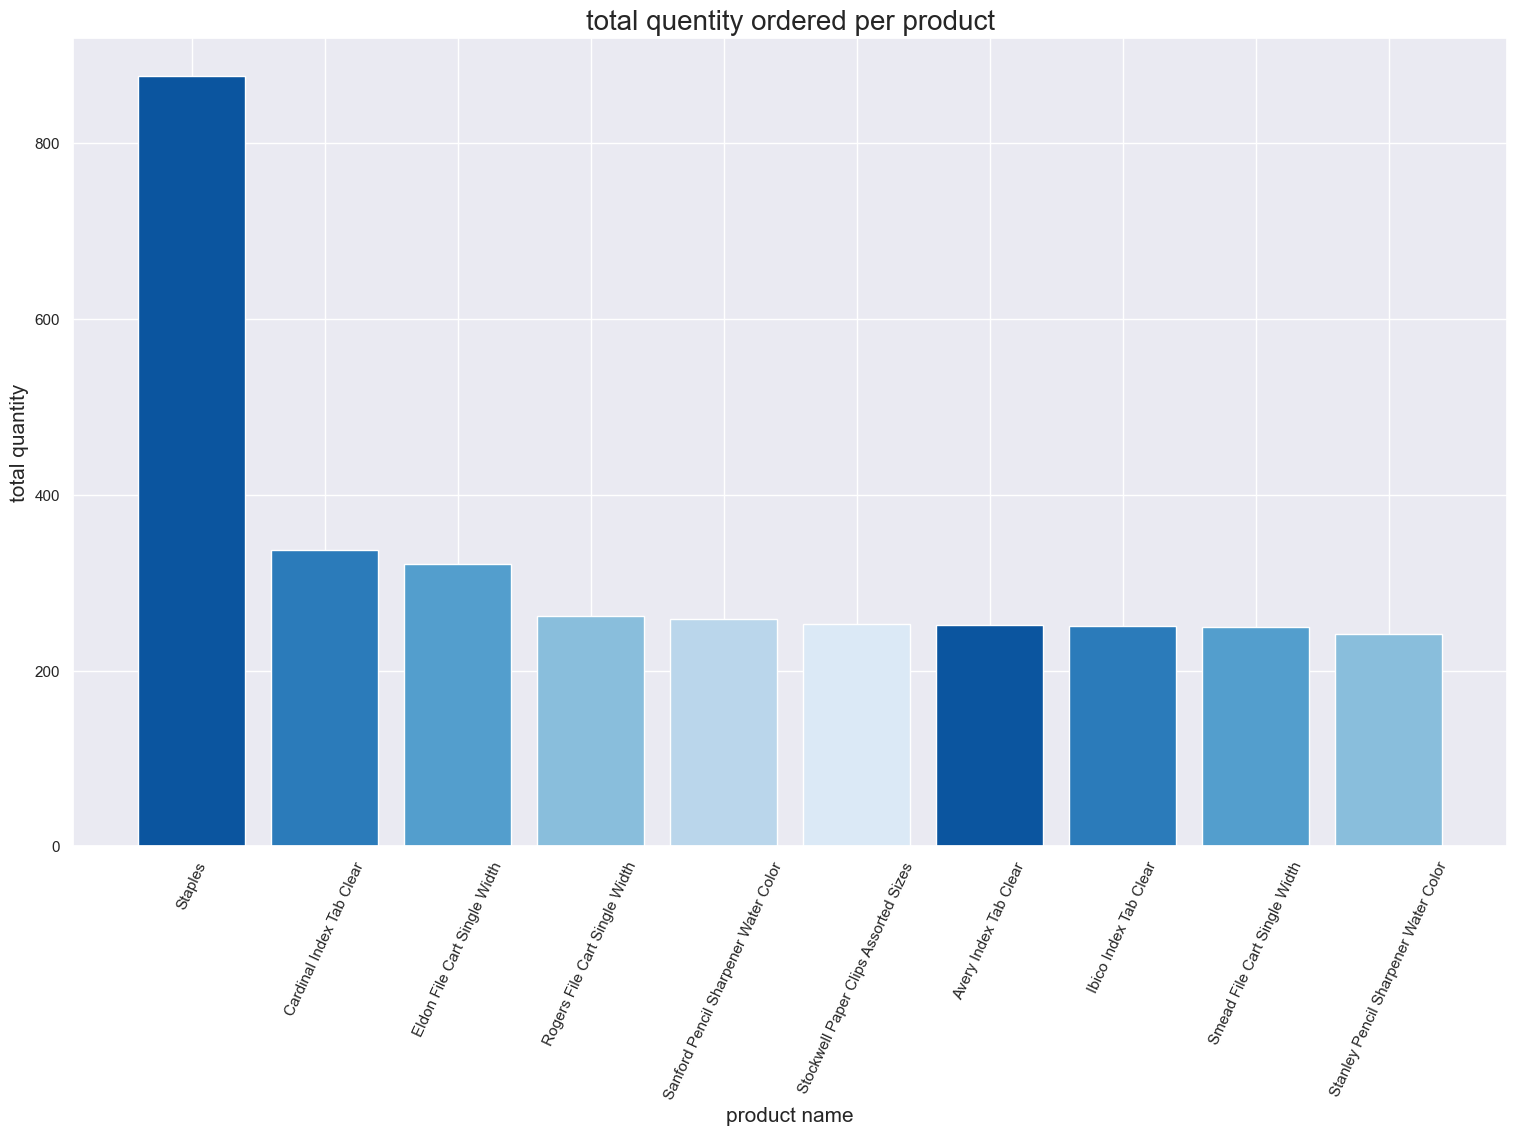

In [117]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation=65)
ax.bar(products_x, products_y, color=color1)
plt.title("total quentity ordered per product", fontsize=20)
plt.ylabel('total quantity', fontsize=15)
plt.xlabel('product name', fontsize=15)

> - #### The most sold product was Staples

In [118]:
# orders with the maximum profit 
data10 = data.sort_values('profit',ascending=False).head(10)[['id','customer_name','profit']]
data10

,id,customer_name,profit
37076,37077,Carlos Meador,836.3407
47390,47391,Steve Nguyen,835.1096
313,314,Jill Matthias,816.1439
50125,50126,Jack Garza,800.7168
33011,33012,Jennifer Halladay,788.1510
21707,21708,Anthony Witt,785.4197
40449,40450,Joy Bell-,766.1199
48903,48904,Darren Koutras,754.6383
29583,29584,Joel Eaton,750.6850
31995,31996,Allen Armold,746.8747


In [119]:
test = data.groupby('customer_name').count().sort_values('id',ascending=False).head(10)[["id"]]
test

,id
customer_name,
Muhammed Yedwab,108
Steven Ward,106
Gary Hwang,102
Bill Eplett,102
Patrick O'Brill,102
Harry Greene,101
Eric Murdock,100
Art Ferguson,98
Brosina Hoffman,97


> #### Muhammed Yedwab came out at top of our customers making 108 orders

# <a id='conc'> Conclusion</a>


#### shipping mood & segments
> - most used shipping cost was standard class representing 60% 
> - our demanded segment was consumers about 51% while home office and corporates represent less than the half 49%
#### categories & sub-categories & products
><b> we have 3 types of categories (*office supplies*, *technology* and *furneturs*):</b> </p>
    the most ordered category was --> <b>office supplies</b> specifically <b>(binders, storage, and arts)</b> these three sub-categories were the top three sub-categories in terms of orders as well as profit.
    the most ordered product from office supplies was <b>staples</b> it was an outlier compared to the other quantity ordered from the other products</p>
<b> suggestions</b> --> increasing the cost for these sub-categories, since there's a need for them in the market

#### County & States
> - Us was our top country in terms of orders and profit it represents 19% of the orders 
> - California which is a state in Us represents 4% of the total orders ordered from the 1094 states that we sell to which is a pretty huge portion
> - most of the orders in the US were by standard consumers, and the demanded category was office supplies </p>
<b> suggestions</b> --> we suggest investing more in R&D for the office supplies. maybe raising the price of office supplies in the Us to gain more profit since there is a demand for it 
#### Market
we have 7 markets <b>Apac - Latam - Us - Eu - Africa - Emea - canada </b>
><b>(Apac, Latam, Us and Eu)</b>
><br>
><br>
>----> ordered: 80.4% of the orders</p> 
----> produced: 87% of the profit
><br>
><br>
>while <b>(Africa, Emea and canada)</b>
><br>
><br>
----> ordered: 19.5% of orders<br>
----> produced: 12.35% of the profit (which seems un profitable compairong to the amount of orders)
><br>
><br>
>taking a closser look at these three markets <b>Africa, Emea and canada</b>
><br>
alhtough Emea got more orders than africa but it produces less profit than Africa 
><br>
><br>
<b> suggestions</b>
> - we suggest avoiding Emea and canada(canada is the lowest as a market and a region in terms of orders as well as profit)
><br>
> - another option to avoid Emea market and try to offer some discounts in canada, it was the least in terms of discount so maybe if we offered more discount we could have a market there
#### time serise analysis
> ##### by analyzing our time series from 2011 to 2014 we can notice the following 
>       --> a growing trend in the number of orders as well as profit and sales from 2011 to 2014
> ###### if we took a closer look at each month we'll notice 
> - our profit raises by 27.29% by the beginning of November and stay high till December
><br>
>    <b>reason</b> ---> this happens as we approach Christmas in December and thanksgiving in November as well as the other occasions that occur in these two months all over the world
><br>
>    <b>suggestions</b>---> we suggest raising the unit price for the demanded products at the end of each year starting from 
November to gain more profit
><br>
><br>
> -at the beginning of each year there is a drop in profit by about 60.52%
><br>
>    <b>reason</b>--->  customers have spent most of their money on the occasions of the previous year
><br>
>    <b>suggestions</b>---> making more offers and discounts at the beginning of each year to encourage customers to buy 

## <a id='ml' >ML</a>

<b>in this section we'll be trying to creat a module that predict quantity </b>

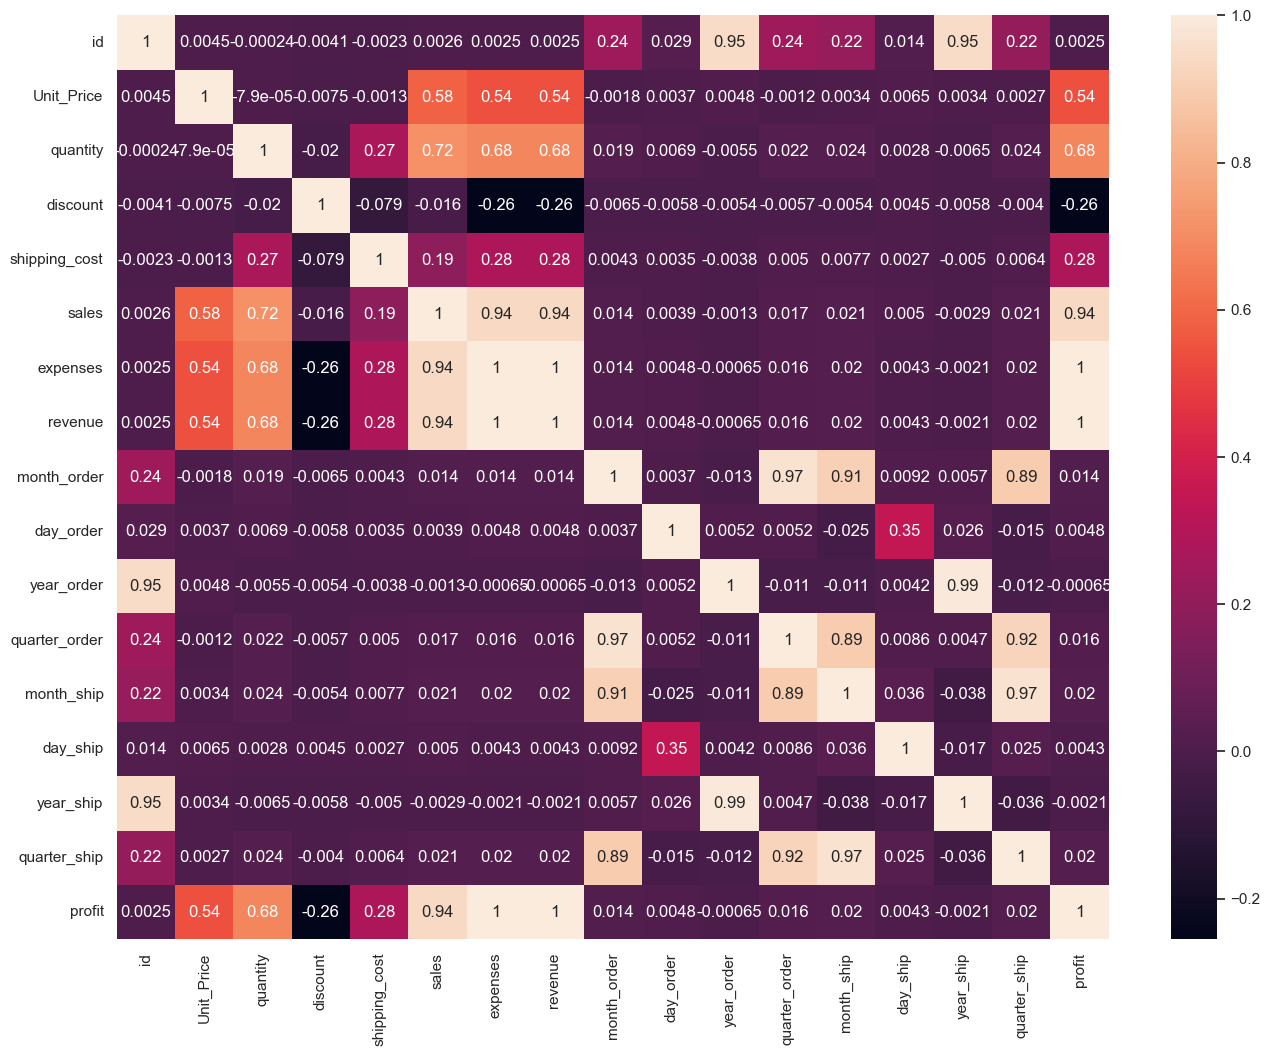

In [120]:
#a correlation matrix to show relationship between features
fig,axes = plt.subplots(1, 1, figsize=(16,12))
sns. heatmap(data.corr(), annot= True) 
plt.show()

In [121]:
data.dtypes

id                         int64
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
Unit_Price                 int64
quantity                   int64
discount                 float64
shipping_cost            float64
order_priority            object
sales                      int64
expenses                 float64
revenue                  float64
month_order                int64
day_order                  int64
year_order                 int64
quarter_order              int64
month_ship                 int64
day_ship                   int64
year_ship                  int64
quarter_ship               int64
profit    

In [122]:
#drop some columns
data.drop(['id','product_id','product_name','order_date','ship_date','customer_name'],axis=1,inplace = True)

## Encoding our textual features to be numerical and use it in our ML model.

In [131]:
#importing encoding libraries needed
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
le = LabelEncoder()
ordinal_e = OrdinalEncoder()

In [134]:
#Label encoding.
data["segment"]=le.fit_transform(data["segment"])
data["state"]=le.fit_transform(data["state"])
data["country"]=le.fit_transform(data["country"])
data["market"]=le.fit_transform(data["market"])
data["region"]=le.fit_transform(data["region"])
data["category"]=le.fit_transform(data["category"])
data["sub_category"]=le.fit_transform(data["sub_category"])

In [126]:
#Ordinal encoding for Ordinal categorical features.
data["order_priority"]=ordinal_e.fit_transform(data)
data['order_priority']

In [130]:
data["ship_mode"]=ordinal_e.fit_transform(data)
data['ship_mode']

0        3.0
1        3.0
2        2.0
3        2.0
4        3.0
        ... 
51313    3.0
51314    3.0
51315    3.0
51316    3.0
51317    3.0
Name: ship_mode, Length: 51297, dtype: float64

In [135]:
#checking the data types again...should be all numbers.
data.dtypes

ship_mode         float64
segment             int32
state               int32
country             int32
market              int32
region              int32
category            int32
sub_category        int32
Unit_Price          int64
quantity            int64
discount          float64
shipping_cost     float64
order_priority    float64
sales               int64
expenses          float64
revenue           float64
month_order         int64
day_order           int64
year_order          int64
quarter_order       int64
month_ship          int64
day_ship            int64
year_ship           int64
quarter_ship        int64
profit            float64
dtype: object

In [136]:
#our data now in the ML model
data.head(1)

,ship_mode,segment,state,country,market,region,category,sub_category,Unit_Price,quantity,discount,shipping_cost,order_priority,sales,expenses,revenue,month_order,day_order,year_order,quarter_order,month_ship,day_ship,year_ship,quarter_ship,profit
0,3.0,0,255,2,0,0,1,14,211,2,0.0,35.46,3.0,422,397.9902,457.46,1,1,2011,1,1,6,2011,1,59.4698


## Building the ML model to predict order's quantity

#### importing the ML regression libraries

In [137]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm

In [138]:
#X: features.
#y: prediction.
X = data.drop('quantity' , axis = 1).values
y = data['quantity'].values

In [139]:
X = sm.add_constant(X)

In [140]:
#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [141]:
#standard scaling and normalizing the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler ()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [142]:
#linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [143]:
#the train data score/accuracy
linear_regression_TrainScore = lr.score(X_train,y_train)
linear_regression_TrainScore

0.7821660270868132

In [144]:
#the test data score/accuracy
linear_regression_TestScore = lr.score(X_test,y_test)
linear_regression_TestScore

0.7748732129641421

In [145]:
#Lasso model
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)

Lasso()

In [146]:
#the train data score/accuracy
lasso_TrainScore = lasso_model.score(X_train,y_train)
lasso_TrainScore

0.3186322632753862

In [147]:
#the test data score/accuracy
lasso_TestScore = lasso_model.score(X_test,y_test)
lasso_TestScore

0.3139220361439017

In [148]:
#the ElasticNet model
elastic_net_model = ElasticNet()
elastic_net_model.fit(X_train,y_train)

ElasticNet()

In [149]:
#the train data score/accuracy
elasticNet_TrainScore = elastic_net_model.score(X_train,y_train)
elasticNet_TrainScore

0.4299626349956862

In [150]:
#the test data score/accuracy
elasticNet_TestScore = elastic_net_model.score(X_test,y_test)
elasticNet_TestScore

0.42378273606416406

In [151]:
#the KNeighborsRegressor model
knr_model = KNeighborsRegressor()
knr_model.fit(X_train,y_train)

KNeighborsRegressor()

In [152]:
#the train data score/accuracy
knr_TrainScore = knr_model.score(X_train,y_train)
knr_TrainScore

0.739183821890153

In [153]:
#the test data score/accuracy
knr_TestScore = knr_model.score(X_test,y_test)
knr_TestScore

0.6053532323151819

In [154]:
#The decisionTreeRegressor model 
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [155]:
#the train data score/accuracy
dtr_TrainScore = dtr_model.score(X_train,y_train)
dtr_TrainScore

1.0

In [156]:
#the test data score/accuracy
dtr_TestScore = dtr_model.score(X_test,y_test)
dtr_TestScore

0.9943421254690752

In [157]:
#The RandomForestRegressor model
rfg_model = RandomForestRegressor()
rfg_model.fit(X_train,y_train)

RandomForestRegressor()

In [158]:
#the train data score/accuracy
rfg_TrainScore = rfg_model.score(X_train,y_train)
rfg_TrainScore

0.999866614255883

In [159]:
#the test data score/accuracy
rfg_TestScore = rfg_model.score(X_test,y_test)
rfg_TestScore

0.9974389571999576

In [160]:
#the ridge model
rid = Ridge(alpha=0.01)
rid.fit(X_train,y_train)

Ridge(alpha=0.01)

In [161]:
#the train data score/accuracy
rid_TrainScore = rid.score(X_train,y_train)
rid_TrainScore

0.7819828802165383

In [162]:
#the test data score/accuracy
rid_TestScore = rid.score(X_test,y_test)
rid_TestScore

0.7838873055374073

In [163]:
model = sm.OLS(y, X).fit()

In [164]:
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     8787.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:37:49   Log-Likelihood:                -75899.
No. Observations:               51297   AIC:                         1.518e+05
Df Residuals:                   51275   BIC:                         1.520e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1980      8.600      0.604      0.5

# Accuracy comparison

In [165]:
Accuracy_table = {'The ML Model': ['linear_regression','lasso','elasticNet','KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','Ridge'],
        'Train_data accuracy': [linear_regression_TrainScore,lasso_TrainScore,elasticNet_TrainScore,knr_TrainScore,dtr_TrainScore,rfg_TrainScore,rid_TrainScore],
        'Test_data accuracy':[linear_regression_TestScore,lasso_TestScore,elasticNet_TestScore,knr_TestScore,dtr_TestScore,rfg_TestScore,rid_TestScore]
        }

Accuracy_table_df = pd.DataFrame(Accuracy_table).sort_values('Test_data accuracy')

print(Accuracy_table_df)

            The ML Model  Train_data accuracy  Test_data accuracy
1                  lasso             0.318632            0.313922
2             elasticNet             0.429963            0.423783
3    KNeighborsRegressor             0.739184            0.605353
0      linear_regression             0.782166            0.774873
6                  Ridge             0.781983            0.783887
4  DecisionTreeRegressor             1.000000            0.994342
5  RandomForestRegressor             0.999867            0.997439
